## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

In [2]:
import warnings

warnings.filterwarnings('ignore')    # Закалебала ругаця насяльника аднака

Прочитаем наш файл с исходными данными:

In [3]:
taxi_data = pd.read_csv("./data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [4]:
# Преобразовываем в формат дата_время
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [5]:
# Определяем временные рамки представленных данных (да, просто смотрим глазами)
taxi_data.sort_values(by='pickup_datetime')

id  vendor_id     pickup_datetime     dropoff_datetime  \
96469    id0190469          2 2016-01-01 00:00:17  2016-01-01 00:14:26   
223872   id1665586          1 2016-01-01 00:00:53  2016-01-01 00:22:27   
713067   id1210365          2 2016-01-01 00:01:01  2016-01-01 00:07:49   
652463   id3888279          1 2016-01-01 00:01:14  2016-01-01 00:05:54   
722901   id0924227          1 2016-01-01 00:01:20  2016-01-01 00:13:36   
...            ...        ...                 ...                  ...   
853710   id1255468          2 2016-06-30 23:58:52  2016-07-01 00:06:44   
419031   id2013516          1 2016-06-30 23:59:09  2016-07-01 00:11:43   
1008720  id0376262          1 2016-06-30 23:59:10  2016-07-01 00:41:36   
405743   id2332349          2 2016-06-30 23:59:37  2016-07-01 00:23:39   
500524   id3719493          2 2016-06-30 23:59:39  2016-07-01 00:43:08   

         passenger_count  pickup_longitude  pickup_latitude  \
96469                  5        -73.981743        40.719158   
223872                 1        -73.985085        40.747166   
713067                 5        -73.965279        40.801041   
652463                 1        -73.982292        40.751331   
722901                 1        -73.970108        40.759800   
...                  ...               ...              ...   
853710                 1        -73.982750        40.745289   
419031                 2        -73.955109        40.689564   
1008720                2        -73.873093        40.774097   
405743                 5        -73.998291        40.722618   
500524                 1        -73.978416        40.791576   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
96469           -73.938828         40.829182                  N            849  
223872          -73.958038         40.717491                  N           1294  
713067          -73.947479         40.815170                  N            408  
652463          -73.991341         40.750340                  N            280  
722901          -73.989357         40.742989                  N            736  
...                    ...               ...                ...            ...  
853710          -73.969002         40.757950                  N            472  
419031          -73.978203         40.685802                  N            754  
1008720         -73.926704         40.856739                  N           2546  
405743          -73.971779         40.762470                  N           1442  
500524          -73.973160         40.675968                  N           2609  

[1458644 rows x 11 columns]

**Ответ:** временной интервал, как видно из таблицы, с 01-01-2016 по 30-06-2016

### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [6]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


**Ответ:** в датафрейме нет пропусков

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [7]:
# Сколько уникальных таксопарков присутствует в данных
taxi_data.vendor_id.nunique()

2

In [8]:
# Каково максимальное количество пассажиров
taxi_data.passenger_count.max()

9

In [9]:
# Чему равна средняя и медианная длительность поездки
taxi_data.trip_duration.describe()[['mean', '50%']]

mean    959.492273
50%     662.000000
Name: trip_duration, dtype: float64

In [10]:
# Чему равно минимальное и максимальное время поездки
taxi_data.trip_duration.describe()[['min', 'max']]

min          1.0
max    3526282.0
Name: trip_duration, dtype: float64

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [8]:
def add_datetime_features(in_df: pd.DataFrame) -> pd.DataFrame:
    '''
    Функция принимает на вход таблицу с данными о поездках (DataFrame)
    и возвращает ту же таблицу с добавленными в нее 3 столбцами:
        * pickup_date - дата включения счетчика - начала поездки (без времени);
        * pickup_hour - час дня включения счетчика;
        * pickup_day_of_week - день недели, в который был включен счетчик.
    В качестве дополнительного аргумента принимает название datetime столбца
    который нужно преобразовать.
    '''
    df = in_df.copy()  # <=== чтобы не запороть исходный df insert_ом

    column_idx = list(df.columns).index('pickup_datetime')

    df.insert(column_idx+1, 'pickup_day_of_week',
              pd.to_datetime(df['pickup_datetime']).dt.day_of_week)
    df.insert(column_idx+1, 'pickup_hour',
              pd.to_datetime(df['pickup_datetime']).dt.hour)
    df.insert(column_idx+1, 'pickup_date',
              pd.to_datetime(df['pickup_datetime']).dt.date)

    return df

In [9]:
taxi_data = add_datetime_features(taxi_data)

In [10]:
taxi_data.pickup_day_of_week[taxi_data.pickup_day_of_week==5].shape

(220868,)

In [14]:
# Делим общее количество записей в датафрейме на общее количество дней в нём
taxi_data.shape[0] / taxi_data.pickup_date.nunique()

8014.527472527472

### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [11]:
holiday_data = pd.read_csv('./data/holiday_data.csv', sep=';')
holiday_data.head(1)

day        date        holiday
0  Friday  2016-01-01  New Years Day

In [12]:
def add_holiday_features(df: pd.DataFrame,
                         holiday: pd.DataFrame) -> pd.DataFrame:
    '''
    Функция принимает на вход две таблицы:
        * таблицу с данными о поездках;
        * таблицу с данными о праздничных днях;
    и возвращает обновленную таблицу с данными о поездках
    с добавленным в нее столбцом pickup_holiday
    - бинарным признаком того, начата ли поездка в праздничный день или нет
    (1 - да, 0 - нет).
    '''
    df['pickup_date'] = pd.to_datetime(df['pickup_date'], format='%Y-%m-%d')
    holiday['date'] = pd.to_datetime(holiday['date'], format='%Y-%m-%d')

    holiday.holiday = 1

    df = df.merge(holiday.drop('day', axis=1),
                  how='left', left_on='pickup_date', right_on='date')

    df.rename(columns={'holiday': 'pickup_holiday'}, inplace=True)
    df.pickup_holiday.fillna(0, inplace=True)

    df.drop('date', axis=1, inplace=True)

    return df

In [13]:
taxi_data = add_holiday_features(taxi_data, holiday_data)

In [14]:
# Чему равна медианная длительность поездки на такси в праздничные дни
taxi_data.trip_duration[taxi_data.pickup_holiday==1].median()

585.0

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [15]:
osrm_data = pd.read_csv('./data/osrm_data_train.csv')
osrm_data.head(1)

id  starting_street        end_street  total_distance  \
0  id2875421  Columbus Circle  East 65th Street          2009.1   

   total_travel_time  number_of_steps  \
0              164.9                5   

                                street_for_each_step      distance_per_step  \
0  Columbus Circle|Central Park West|65th Street ...  0|576.4|885.6|547.1|0   

  travel_time_per_step                      step_maneuvers  \
0   0|61.1|60.1|43.7|0  depart|rotary|turn|new name|arrive   

                        step_direction  \
0  left|straight|right|straight|arrive   

                                  step_location_list  
0  -73.982316,40.767869|-73.981997,40.767688|-73....

In [15]:
taxi_data.head(1)

id  vendor_id     pickup_datetime pickup_date  pickup_hour  \
0  id2875421          2 2016-03-14 17:24:55  2016-03-14           17   

   pickup_day_of_week     dropoff_datetime  passenger_count  pickup_longitude  \
0                   0  2016-03-14 17:32:30                1        -73.982155   

   pickup_latitude  dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0        40.767937          -73.96463         40.765602                  N   

   trip_duration  pickup_holiday  
0            455             0.0

**Видно, что у таблиц одинаковый столбец id, он и будет служить идентификатором при слиянии**

In [16]:
def add_osrm_features(taxi_df: pd.DataFrame,
                      osrm_df: pd.DataFrame) -> pd.DataFrame:
    '''
    Функция принимает на вход две таблицы:
        * таблицу с данными о поездках;
        * таблицу с данными из OSRM;
    и возвращает обновленную таблицу с данными о поездках
    с добавленными в нее 3 столбцами:
        * total_distance;
        * total_travel_time;
        * number_of_steps.
    '''
    osrm = osrm_df[['id',
                    'total_distance',
                    'total_travel_time',
                    'number_of_steps']]

    df = taxi_df.merge(osrm, how='left', left_on='id', right_on='id')

    return df

In [17]:
taxi_data = add_osrm_features(taxi_data, osrm_data)

In [18]:
# Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM
taxi_data.trip_duration.median() - osrm_data.total_travel_time.median()

372.5

In [23]:
# Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   pickup_date         1458644 non-null  datetime64[ns]
 4   pickup_hour         1458644 non-null  int64         
 5   pickup_day_of_week  1458644 non-null  int64         
 6   dropoff_datetime    1458644 non-null  object        
 7   passenger_count     1458644 non-null  int64         
 8   pickup_longitude    1458644 non-null  float64       
 9   pickup_latitude     1458644 non-null  float64       
 10  dropoff_longitude   1458644 non-null  float64       
 11  dropoff_latitude    1458644 non-null  float64       
 12  store_and_fwd_flag  1458644 non-null  object        
 13  trip_duratio

**Ответ:** 1 пропуск в столбцах 15, 16, 17

In [19]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [20]:
def add_geographical_features(in_df: pd.DataFrame) -> pd.DataFrame:
    '''
    Функция принимает на вход таблицу с данными о поездках
    и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
        * haversine_distance - расстояние Хаверсина между точкой,
    в которой был включен счетчик, и точкой, в которой счетчик был выключен;
        * direction - направление движения из точки,
    в которой был включен счетчик, точку, в которой счетчик был выключен.
    '''
    df = in_df.copy()    # <=== Чтобы не поломать insert"ом исходный объект

    df.insert(df.shape[1], 'haversine_distance',
              get_haversine_distance(df.pickup_latitude,
                                     df.pickup_longitude,
                                     df.dropoff_latitude,
                                     df.dropoff_longitude))

    df.insert(df.shape[1], 'direction',
              get_angle_direction(df.pickup_latitude,
                                  df.pickup_longitude,
                                  df.dropoff_latitude,
                                  df.dropoff_longitude))

    return df

In [21]:
taxi_data = add_geographical_features(taxi_data)

In [22]:
# Чему равно медианное расстояние Хаверсина поездок (в киллометрах)
round(taxi_data.haversine_distance.median(), 2)

2.09

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [23]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

KMeans(n_clusters=10, random_state=42)

In [24]:
def add_cluster_features(df: pd.DataFrame,
                         model: cluster.KMeans) -> pd.DataFrame:
    '''
    Функция принимает на вход таблицу с данными о поездках
    и обученный алгоритм кластеризации.
    Возвращает обновленную таблицу с добавленными в нее столбцом geo_cluster
    - географический кластер, к которому относится поездка.
    '''
    df['geo_cluster'] = model.predict(np.hstack((df[['pickup_latitude',
                                                     'pickup_longitude']],
                                                 df[['dropoff_latitude',
                                                     'dropoff_longitude']])))
    return df

In [25]:
taxi_data = add_cluster_features(taxi_data, kmeans)

In [26]:
# Сколько поездок содержится в наименьшем по размеру географическом кластере
taxi_data.geo_cluster.value_counts().min()

2

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [27]:
weather_data = pd.read_csv('./data/weather_data.csv')
weather_data.head(2)

time  temperature  windchill  heat index  humidity  \
0  2015-12-31 02:00:00          7.8        7.1         NaN      0.89   
1  2015-12-31 03:00:00          7.2        5.9         NaN      0.90   

   pressure  dew Point  visibility  wind dir  wind speed  gust speed  precip  \
0    1017.0        6.1         8.0       NNE         5.6         0.0     0.8   
1    1016.5        5.6        12.9  Variable         7.4         0.0     0.3   

  events conditions        date  hour  
0   None   Overcast  2015-12-31     2  
1   None   Overcast  2015-12-31     3

In [28]:
def add_weather_features(taxi: pd.DataFrame,
                         weather: pd.DataFrame) -> pd.DataFrame:
    '''
    Функция принимает на вход две таблицы:
        * таблицу с данными о поездках;
        * таблицу с данными о погодных условиях на каждый час;
    и возвращает таблицу с данными о поездках с добавленными в нее 5 столбцами:
        * temperature - температура;
        * visibility - видимость;
        * wind speed - средняя скорость ветра;
        * precip - количество осадков;
        * events - погодные явления.
    '''
    weather = weather[['date',
                       'hour',
                       'temperature',
                       'visibility',
                       'wind speed',
                       'precip',
                       'events']]

    weather.date = pd.to_datetime(weather.date, format='%Y-%m-%d')
    taxi.pickup_date = pd.to_datetime(taxi.pickup_date, format='%Y-%m-%d')

    taxi = taxi.merge(weather, how='left',
                      left_on=['pickup_date', 'pickup_hour'],
                      right_on=['date', 'hour'])

    taxi.drop(['date', 'hour'], axis=1, inplace=True)

    return taxi

In [29]:
taxi_data = add_weather_features(taxi_data, weather_data)

In [30]:
# Сколько поездок было совершено в снежную погоду
taxi_data.events[taxi_data.events=='Snow'].count()

13126

In [31]:
idx = taxi_data['temperature'].isna() &\
      taxi_data['visibility'].isna() &\
      taxi_data['wind speed'].isna() &\
      taxi_data['precip'].isna() &\
      taxi_data['events'].isna()

# Сколько процентов от общего количества наблюдений в таблице с данными 
# о поездках занимают пропуски в столбцах с погодными условиями
round(taxi_data[idx].shape[0] / taxi_data.shape[0] * 100, 2)

0.82

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [32]:
def fill_null_weather_data(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Функция принимает на вход таблицу с данными о поездках,
    заполняет пропущенные значения в столбцах.
    '''
    for col in ['temperature',
                'visibility',
                'wind speed',
                'precip']:

        df[col].fillna(df.groupby('pickup_date')[col].transform('median'),
                       inplace=True)

    df['events'] = df['events'].fillna('None')

    for col in ['total_distance',
                'total_travel_time',
                'number_of_steps']:

        df[col].fillna(df[col].median(), inplace=True)

    return df

In [33]:
taxi_data = fill_null_weather_data(taxi_data)

In [34]:
# Чему равна медиана в столбце temperature после заполнения пропусков
taxi_data.temperature.median()

11.1

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


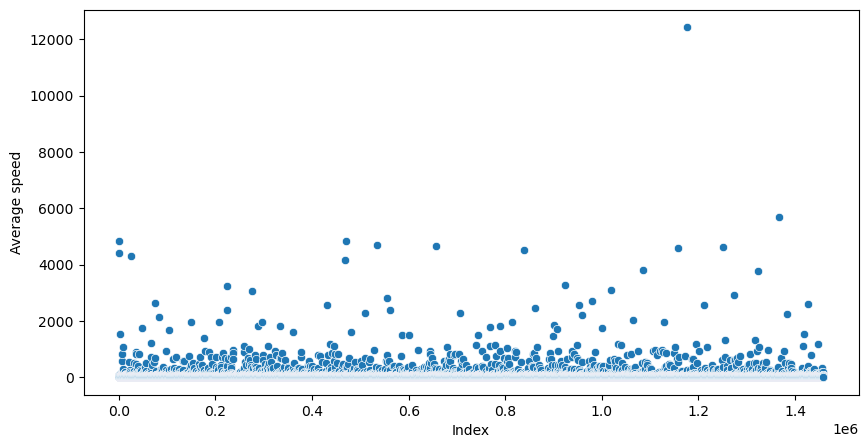

In [47]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [35]:
taxi_data = taxi_data[taxi_data.trip_duration <= (60*60*24)]

In [36]:
idx = (taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6) > 300
taxi_data = taxi_data[~idx]

In [37]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458233 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458233 non-null  object        
 1   vendor_id           1458233 non-null  int64         
 2   pickup_datetime     1458233 non-null  datetime64[ns]
 3   pickup_date         1458233 non-null  datetime64[ns]
 4   pickup_hour         1458233 non-null  int64         
 5   pickup_day_of_week  1458233 non-null  int64         
 6   dropoff_datetime    1458233 non-null  object        
 7   passenger_count     1458233 non-null  int64         
 8   pickup_longitude    1458233 non-null  float64       
 9   pickup_latitude     1458233 non-null  float64       
 10  dropoff_longitude   1458233 non-null  float64       
 11  dropoff_latitude    1458233 non-null  float64       
 12  store_and_fwd_flag  1458233 non-null  object        
 13  trip_duratio

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [38]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

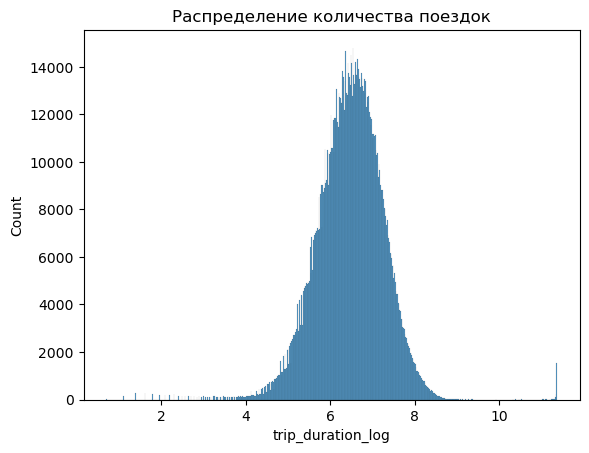

In [52]:
histplot = sns.histplot(taxi_data['trip_duration_log'])
histplot.set_title('Распределение количества поездок');

**Визуально похоже на нормальное распределение**

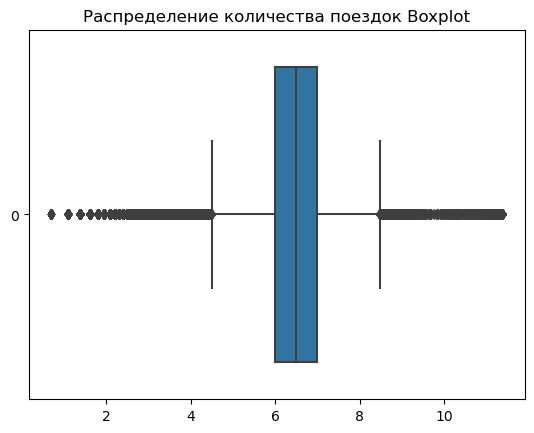

In [53]:
boxplot = sns.boxplot(taxi_data['trip_duration_log'], orient='h')
boxplot.set_title('Распределение количества поездок Boxplot');

**Имеется множество выбросов за обеими границами**

In [54]:
from scipy.stats import normaltest

alpha = 0.05

k2, p = normaltest(taxi_data['trip_duration_log'])

print("p = {:g}".format(p))

if p < alpha:  # нулевая гипотеза: распределение является нормальным
    print("Нулевая гипотеза должна быть отвергнута")
else:
    print("Нулевая гипотеза не может быть отвергнута")

p = 0
Нулевая гипотеза должна быть отвергнута


**Вывод:** распределение не является нормальным

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

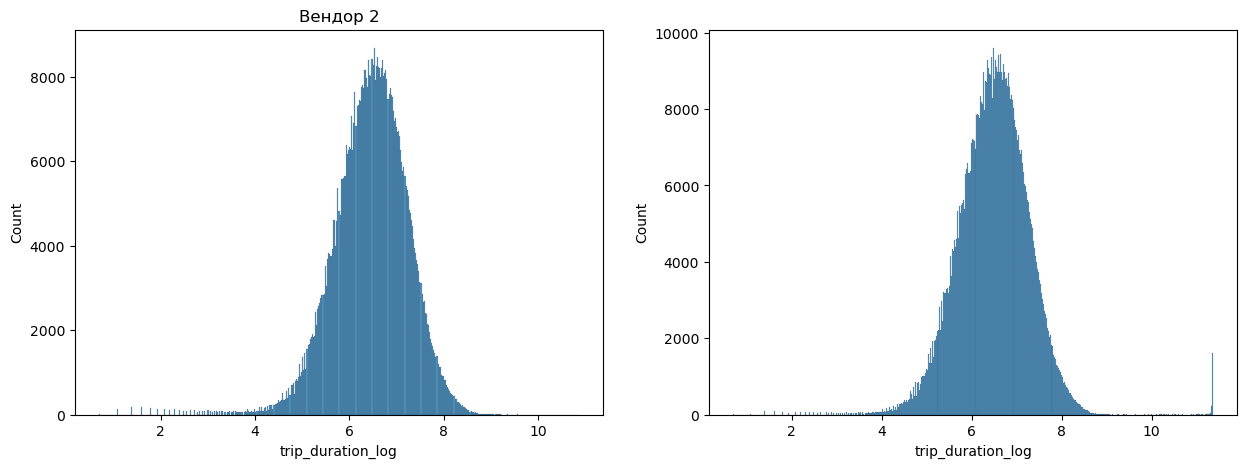

In [157]:
vendor_id_1 = taxi_data[taxi_data['vendor_id']==1]['trip_duration_log']
vendor_id_2 = taxi_data[taxi_data['vendor_id']==2]['trip_duration_log']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

vend1_histplot = sns.histplot(data=vendor_id_1, ax=axes[0]);
vend1_histplot.set_title('Вендор 1');

vend2_histplot = sns.histplot(data=vendor_id_2, ax=axes[1]);
vend1_histplot.set_title('Вендор 2');

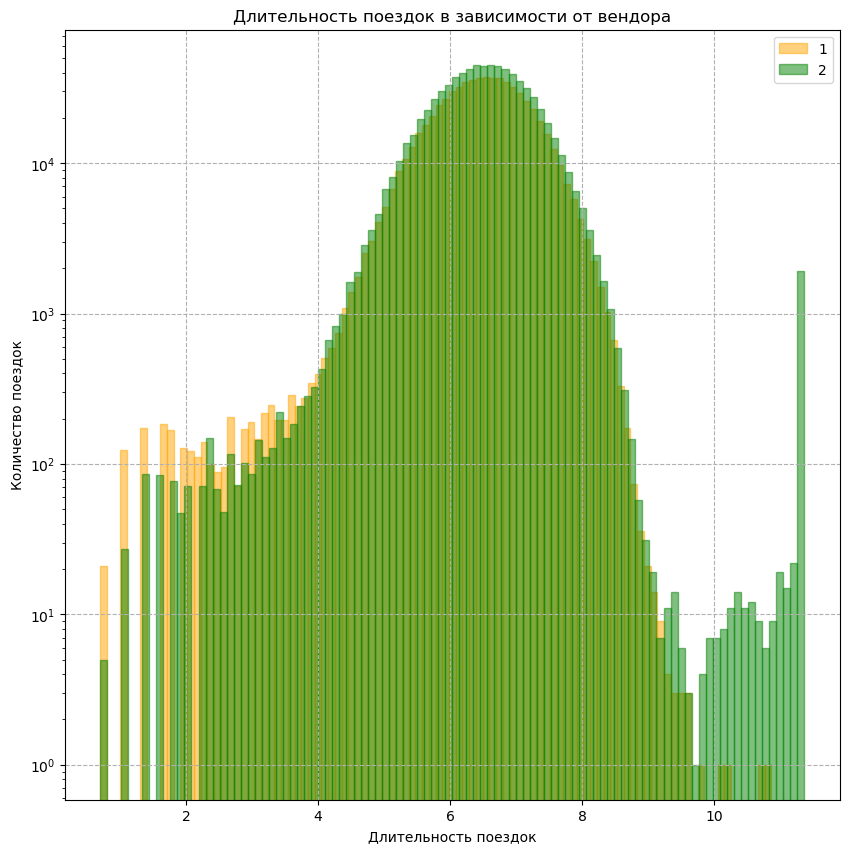

In [61]:
plt.figure(figsize=(10, 10))

plt.hist(vendor_id_1, 
         bins = 100, 
         facecolor = 'orange', 
         edgecolor = 'orange',
         alpha = 0.5,
         label = '1')

plt.hist(vendor_id_2, 
         bins = 100, 
         facecolor = 'green', 
         edgecolor = 'green',
         alpha = 0.5,
         label = '2')

plt.legend()
plt.title('Длительность поездок в зависимости от вендора')
plt.xlabel('Длительность поездок')
plt.ylabel('Количество поездок')
plt.grid(linestyle='--')
plt.yscale('log')
plt.show()

Text(0.5, 1.0, 'Длительность поездок в зависимости от отправки сообщения поставщику')

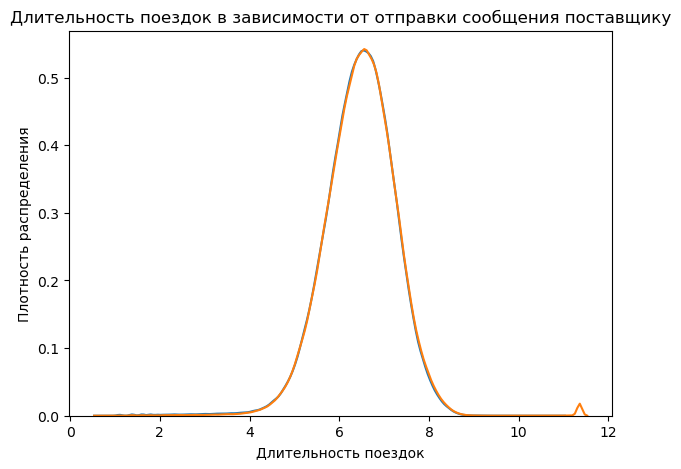

: 

In [158]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.kdeplot(vendor_id_1, ax=ax)
sns.kdeplot(vendor_id_2, ax=ax)

ax.set_xlabel('Длительность поездок')
ax.set_ylabel('Плотность распределения')
ax.set_title('Длительность поездок в зависимости от отправки сообщения поставщику')

**Как видно из представленных графиков, распределения в зависимости от вендора практически идентичны.**

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

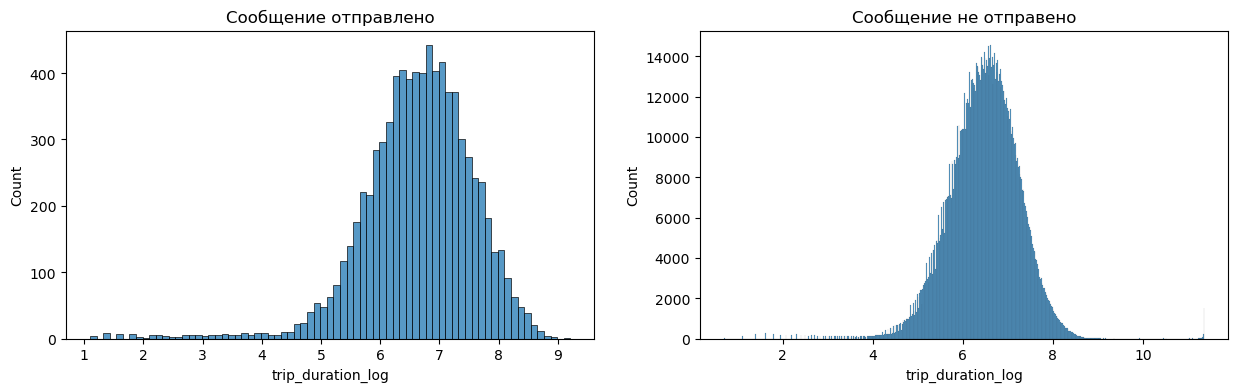

In [151]:
send_Y = taxi_data[taxi_data['store_and_fwd_flag']=='Y']['trip_duration_log']
send_N = taxi_data[taxi_data['store_and_fwd_flag']=='N']['trip_duration_log']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot1 = sns.histplot(data=send_Y, ax=axes[0]);
histplot1.set_title('Сообщение отправлено');

histplot2 = sns.histplot(data=send_N, ax=axes[1]);
histplot2.set_title('Сообщение не отправено');

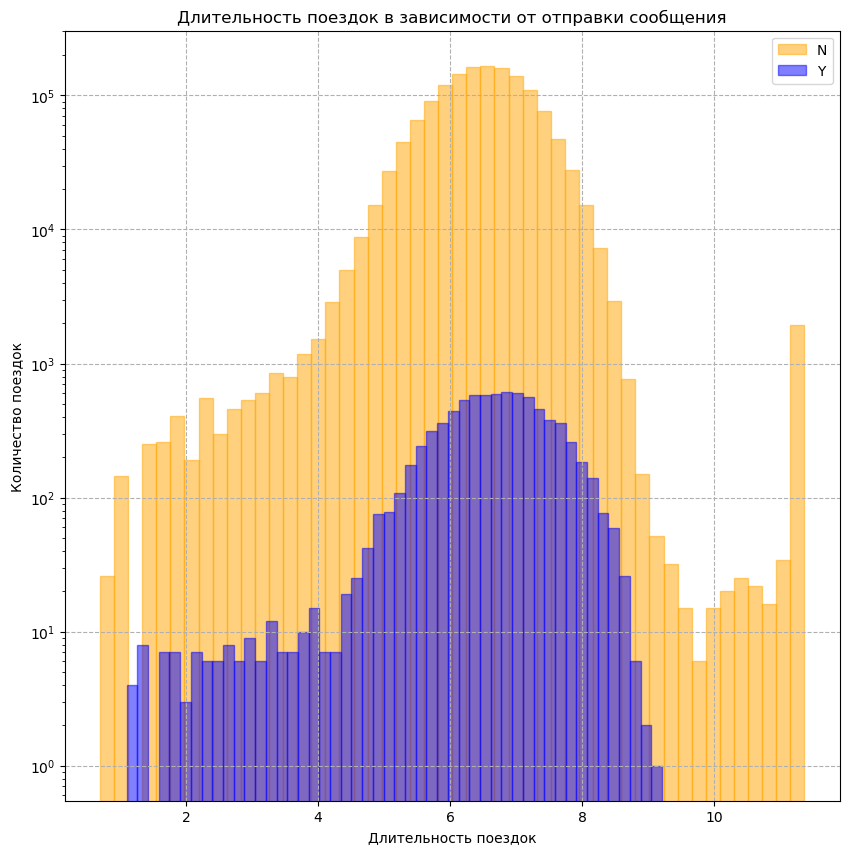

In [155]:
plt.figure(figsize=(10, 10))

plt.hist(send_N, 
         bins = 50, 
         facecolor = 'orange', 
         edgecolor = 'orange',
         alpha = 0.5,
         label = 'N')

plt.hist(send_Y, 
         bins = 50, 
         facecolor = 'blue', 
         edgecolor = 'blue',
         alpha = 0.5,
         label = 'Y')

plt.legend()
plt.title('Длительность поездок в зависимости от отправки сообщения')
plt.xlabel('Длительность поездок')
plt.ylabel('Количество поездок')
plt.grid(linestyle='--')
plt.yscale('log')
plt.show()

In [78]:
taxi_data.store_and_fwd_flag[taxi_data.store_and_fwd_flag=='Y'].count()

8041

In [79]:
taxi_data.store_and_fwd_flag[taxi_data.store_and_fwd_flag=='N'].count()

1450192

Text(0.5, 1.0, 'Длительность поездок в зависимости от отправки сообщения поставщику')

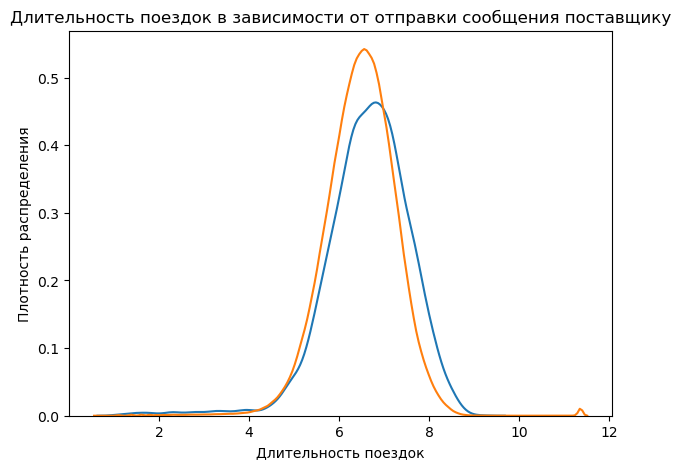

In [154]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.kdeplot(send_Y, ax=ax)
sns.kdeplot(send_N, ax=ax)

ax.set_xlabel('Длительность поездок')
ax.set_ylabel('Плотность распределения')
ax.set_title('Длительность поездок в зависимости от отправки сообщения поставщику')

**И даже вот тут мы видим, что это ***пусть не идеально совпадающие***, но достаточно похожие распределения. У "желтого" матожидание где-то в 6.4, у синего в 6.5-6.6. Это может быть случайное отклонение за счёт огромной разницы в выборках (8041 против 1450192). Поэтому дать однозначный ответ на вопрос, имеет ли значимость для предикции длительности поездки этот параметр анализируя только графики не представляется возможным. Вопрос считаю некорректным.**

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

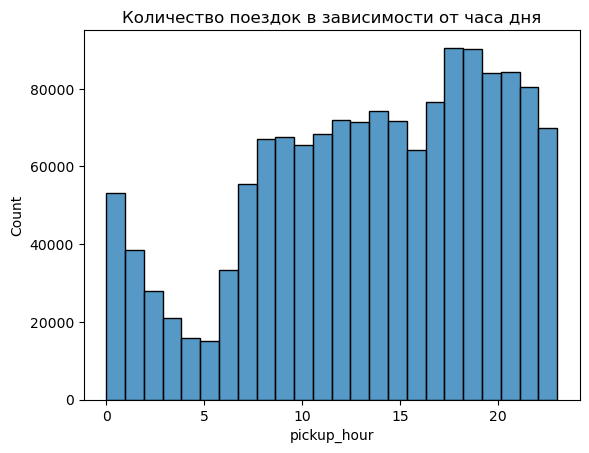

In [80]:
histplot = sns.histplot(taxi_data['pickup_hour'], bins = 24);
histplot.set_title('Количество поездок в зависимости от часа дня');

**Количество поездок примерно равно в периоды 18 и 19 часов, но в 18 часов чуть больше**

In [81]:
vis_df = taxi_data[['pickup_hour', 'trip_duration']]
vis_df = vis_df.groupby(by='pickup_hour').median()
vis_df = vis_df.reset_index()

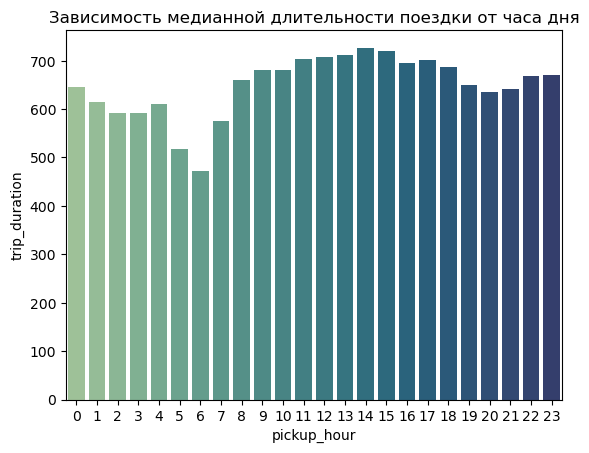

In [82]:
barplot = sns.barplot(vis_df, x='pickup_hour', y='trip_duration', palette="crest")
barplot.set_title('Зависимость медианной длительности поездки от часа дня');

**Медианная длительность поездок наибольшая в период 14 часов**

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


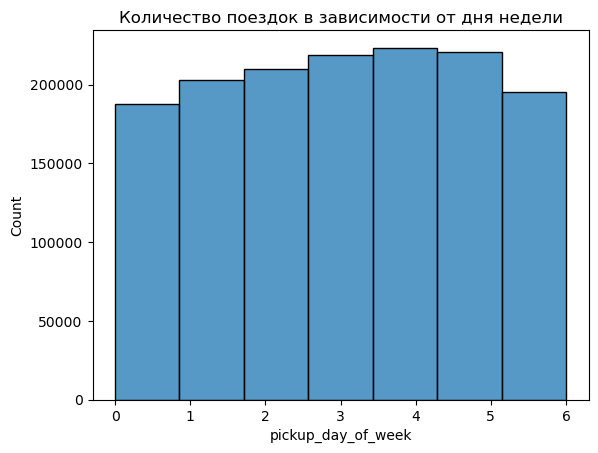

In [83]:
histplot = sns.histplot(taxi_data['pickup_day_of_week'], bins = 7);
histplot.set_title('Количество поездок в зависимости от дня недели');

**В пятницу совершается большее число поездок**

In [84]:
vis_df = taxi_data[['pickup_day_of_week', 'trip_duration']]
vis_df = vis_df.groupby(by='pickup_day_of_week').median()
vis_df = vis_df.reset_index()

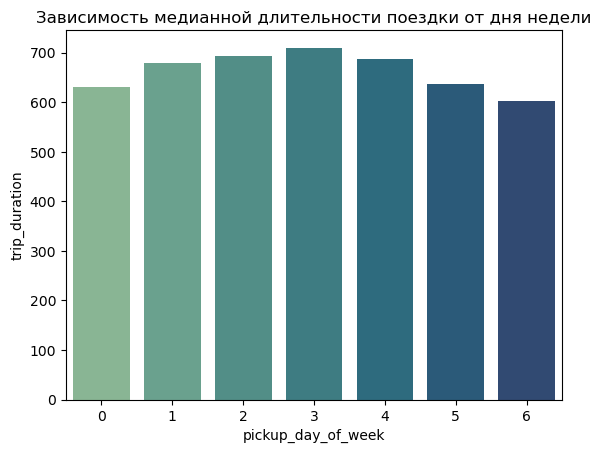

In [85]:
barplot = sns.barplot(vis_df, x='pickup_day_of_week', y='trip_duration', palette="crest")
barplot.set_title('Зависимость медианной длительности поездки от дня недели');

**Но в четверг поездки самые длительные**

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

**С учётом того, что мониторы компьютеров имеют ширину гораздо большую, чем высоту, в данной визуализации правильнее часы откладывать по горизонтали, а дни по вертикали (с учётом их количественного соотношения). Что я и сделаю. Если кто-то будет проверять мою работу на сотовом телефоне, напишите, я обязательно переделаю график.**

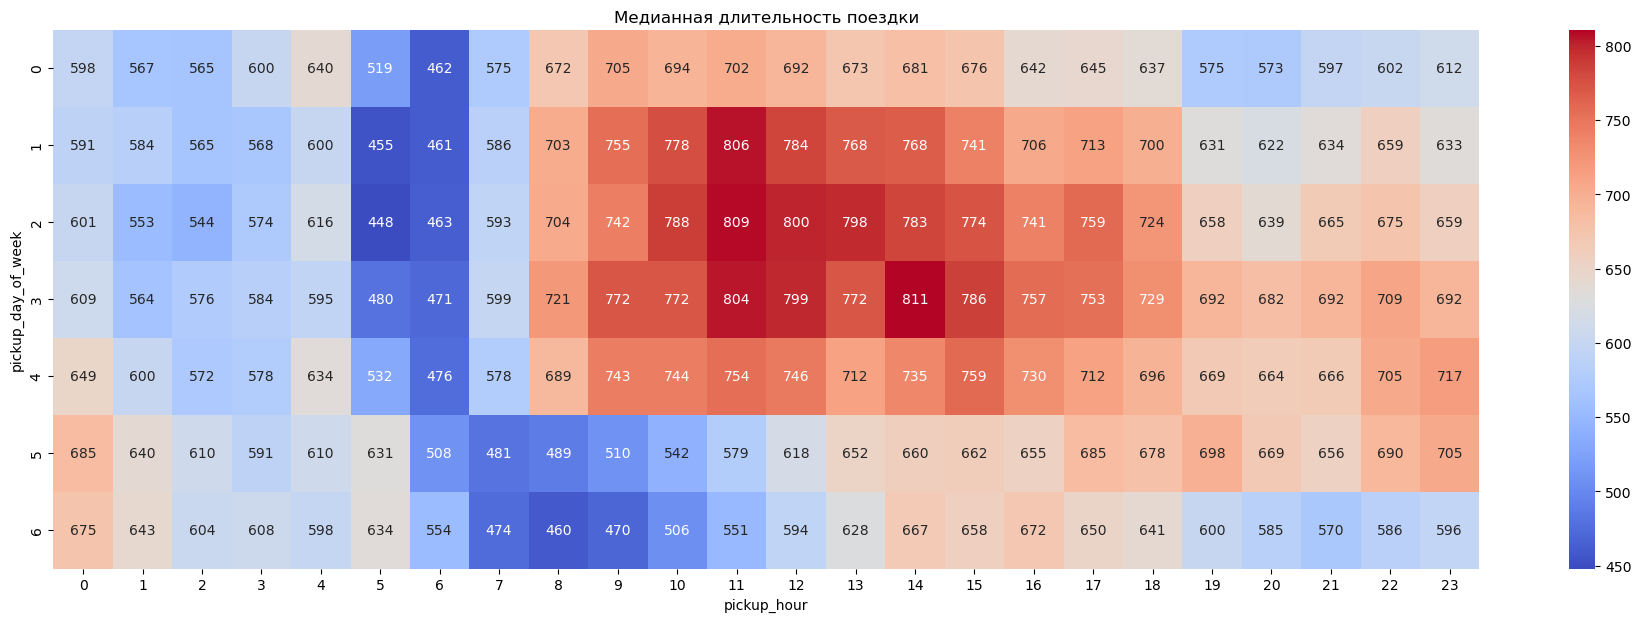

In [86]:
day_time_duration = taxi_data.pivot_table(values='trip_duration',
                                          index='pickup_hour',
                                          columns='pickup_day_of_week',
                                          aggfunc='median')

day_time_duration = day_time_duration.T

f, ax = plt.subplots(figsize=(23, 7))

heatmap = sns.heatmap(data=day_time_duration,
                      annot=True, fmt='.0f',
                      cmap='coolwarm', ax=ax)

heatmap.set_title('Медианная длительность поездки');

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


In [87]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

idx = ((taxi_data['pickup_longitude'] >= city_long_border[0])
     & (taxi_data['pickup_longitude'] <= city_long_border[1])
     & (taxi_data['pickup_latitude'] >= city_lat_border[0]) 
     & (taxi_data['pickup_latitude'] <= city_lat_border[1])
     & (taxi_data['dropoff_longitude'] >= city_long_border[0])
     & (taxi_data['dropoff_longitude'] <= city_long_border[1])
     & (taxi_data['dropoff_latitude'] >= city_lat_border[0])
     & (taxi_data['dropoff_latitude'] <= city_lat_border[1]))

In [88]:
df_map = taxi_data[['pickup_latitude',
                    'pickup_longitude', 
                    'dropoff_latitude', 
                    'dropoff_longitude', 
                    'geo_cluster']][idx]

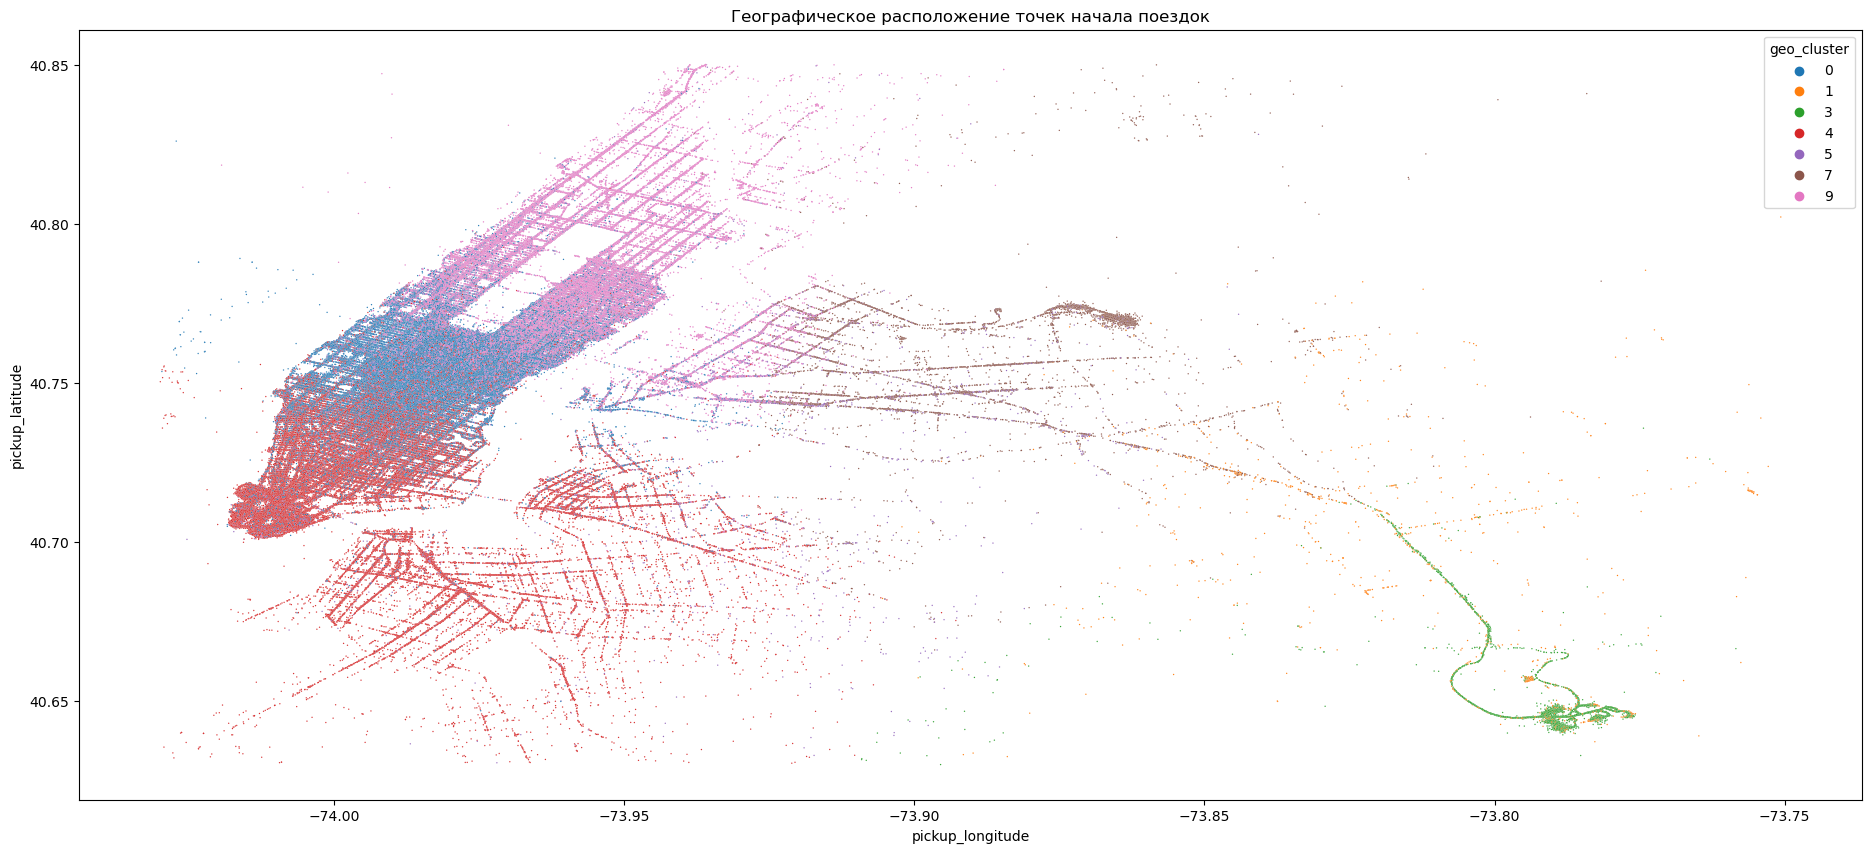

In [89]:
fig = plt.figure(figsize=(23, 10))

scat_plot = sns.scatterplot(data=df_map, 
                            x='pickup_longitude', 
                            y='pickup_latitude',
                            hue='geo_cluster', 
                            palette='tab10',
                            s=1);

scat_plot.set_title('Географическое расположение точек начала поездок');

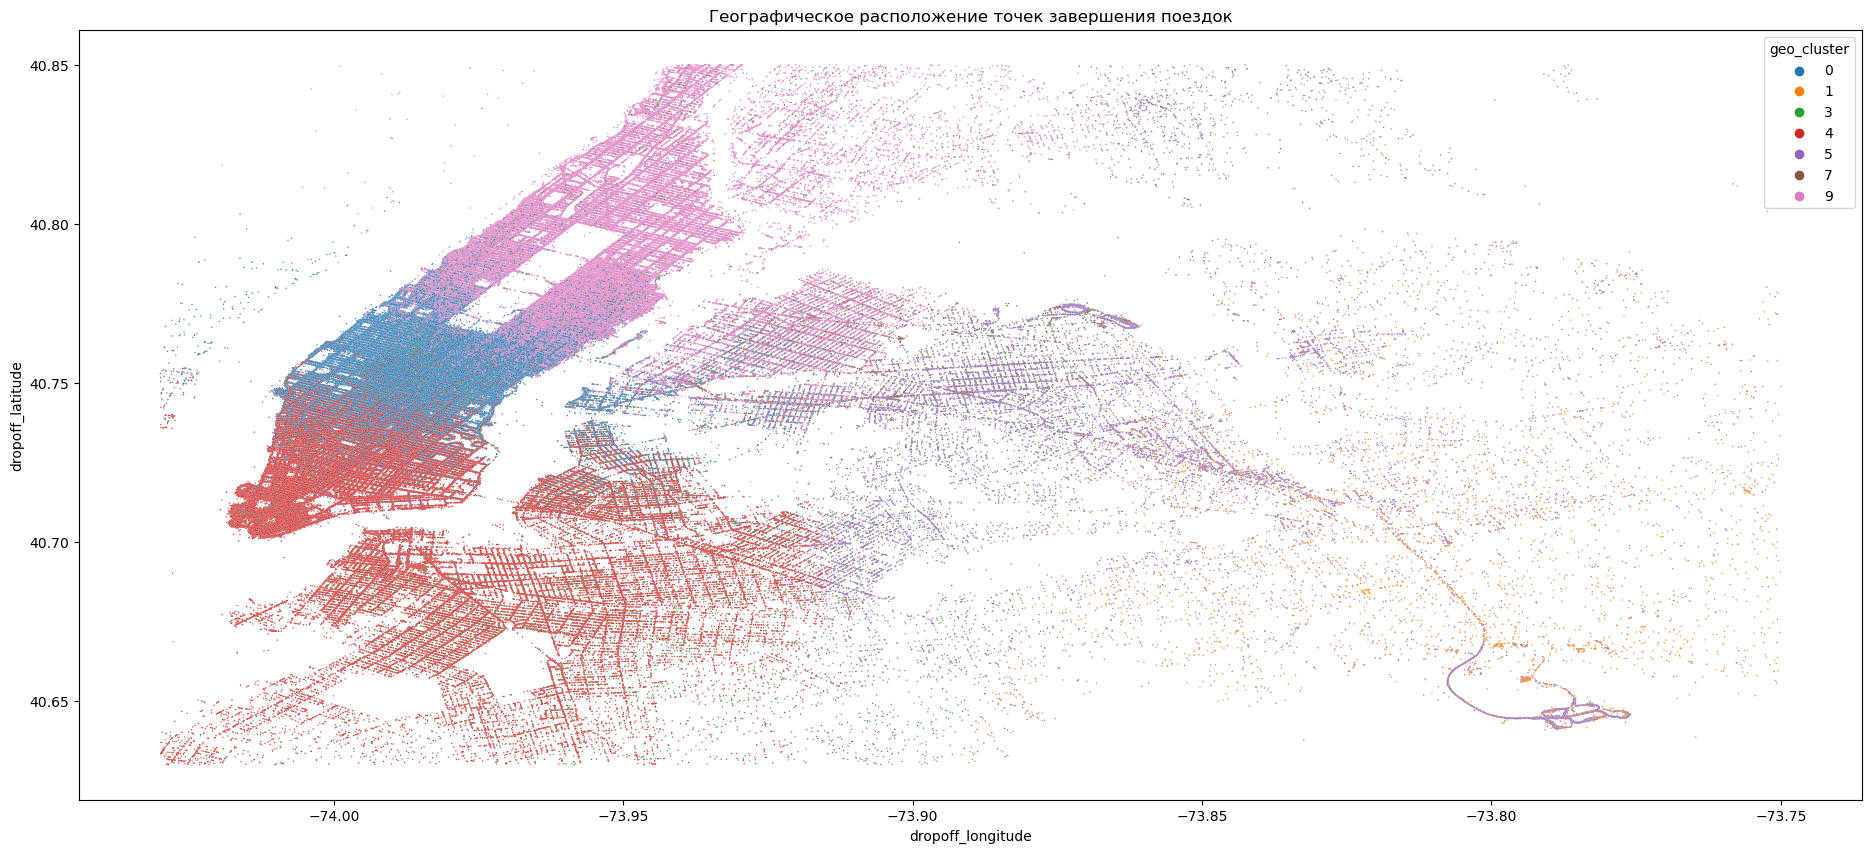

In [90]:
fig = plt.figure(figsize=(23, 10))

scat_plot = sns.scatterplot(data=df_map, 
                            x='dropoff_longitude', 
                            y='dropoff_latitude',
                            hue='geo_cluster', 
                            palette='tab10',
                            s=1);

scat_plot.set_title('Географическое расположение точек завершения поездок');

**Я перебрал кучу расцветок и реально в недоумении, как здесь можно угадать, какие кластеры отсутствуют на диаграмме...**

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [40]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'pickup_date', 'pickup_hour',
       'pickup_day_of_week', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [39]:
train_data = taxi_data.copy()
train_data.head()

id  vendor_id     pickup_datetime pickup_date  pickup_hour  \
0  id2875421          2 2016-03-14 17:24:55  2016-03-14           17   
1  id2377394          1 2016-06-12 00:43:35  2016-06-12            0   
2  id3858529          2 2016-01-19 11:35:24  2016-01-19           11   
3  id3504673          2 2016-04-06 19:32:31  2016-04-06           19   
4  id2181028          2 2016-03-26 13:30:55  2016-03-26           13   

   pickup_day_of_week     dropoff_datetime  passenger_count  pickup_longitude  \
0                   0  2016-03-14 17:32:30                1        -73.982155   
1                   6  2016-06-12 00:54:38                1        -73.980415   
2                   1  2016-01-19 12:10:48                1        -73.979027   
3                   2  2016-04-06 19:39:40                1        -74.010040   
4                   5  2016-03-26 13:38:10                1        -73.973053   

   pickup_latitude  ...  number_of_steps  haversine_distance   direction  \
0        40.767937  ...              5.0            1.498521   99.970196   
1        40.738564  ...              6.0            1.805507 -117.153768   
2        40.763939  ...             16.0            6.385098 -159.680165   
3        40.719971  ...              4.0            1.485498 -172.737700   
4        40.793209  ...              5.0            1.188588  179.473585   

   geo_cluster  temperature  visibility  wind speed  precip  events  \
0            9          4.4         8.0        27.8     0.3    None   
1            4         28.9        16.1         7.4     0.0    None   
2            4         -6.7        16.1        24.1     0.0    None   
3            4          7.2        16.1        25.9     0.0    None   
4            9          9.4        16.1         9.3     0.0    None   

   trip_duration_log  
0           6.122493  
1           6.498282  
2           7.661527  
3           6.063785  
4           6.077642  

[5 rows x 27 columns]

### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?
**Ответ:** Идентификатор поездки id. Он никак не связан с длительностью поездки и не имеет значения при её прогнозировании.

б) Утечка данных (data leak) - это…
**Ответ:** когда данные, используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях.

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?
**Ответ:** dropoff_datetime. 

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?
**Ответ:** 25 столбцов.

In [41]:
train_data.drop(['id', 'dropoff_datetime'], axis=1, inplace=True)

In [42]:
train_data.shape[1]

25

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [43]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [44]:
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x==1 else 1)
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 1)

In [45]:
# среднее по закодированному столбцу vendor_id
round(train_data['vendor_id'].mean(), 2)

0.53

In [45]:
# среднее по закодированному столбцу store_and_fwd_flag
round(train_data['store_and_fwd_flag'].mean(), 3)

0.006

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [46]:
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']
encoder = preprocessing.OneHotEncoder(drop='first', sparse=False, categories='auto')
data_onehot = encoder.fit_transform(train_data[columns_to_change])

column_names = encoder.get_feature_names_out(columns_to_change)
data_onehot = pd.DataFrame(data_onehot, columns=column_names)

In [47]:
# Количество бинарных столбцов после кодирования
data_onehot.shape[1]

18

Добавим полученную таблицу с закодированными признаками:

In [48]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [49]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [50]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [51]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=25)
selector.fit(X_train, y_train_log)
best_features = selector.get_feature_names_out()
X_train = X_train[best_features]
X_valid = X_valid[best_features]
list(best_features)

['vendor_id',
 'pickup_hour',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_holiday',
 'total_distance',
 'total_travel_time',
 'number_of_steps',
 'haversine_distance',
 'temperature',
 'pickup_day_of_week_1',
 'pickup_day_of_week_2',
 'pickup_day_of_week_3',
 'pickup_day_of_week_4',
 'pickup_day_of_week_5',
 'pickup_day_of_week_6',
 'geo_cluster_1',
 'geo_cluster_3',
 'geo_cluster_5',
 'geo_cluster_7',
 'geo_cluster_9']

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [52]:
scaler = preprocessing.MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [53]:
# среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки
round(pd.DataFrame(X_valid_scaled)[0].mean(), 2)

0.54

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977016 entries, 293850 to 121958
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             977016 non-null  int64  
 1   pickup_hour           977016 non-null  int64  
 2   passenger_count       977016 non-null  int64  
 3   pickup_longitude      977016 non-null  float64
 4   pickup_latitude       977016 non-null  float64
 5   dropoff_longitude     977016 non-null  float64
 6   dropoff_latitude      977016 non-null  float64
 7   store_and_fwd_flag    977016 non-null  int64  
 8   pickup_holiday        977016 non-null  float64
 9   total_distance        977016 non-null  float64
 10  total_travel_time     977016 non-null  float64
 11  number_of_steps       977016 non-null  float64
 12  haversine_distance    977016 non-null  float64
 13  temperature           977016 non-null  float64
 14  pickup_day_of_week_1  977016 non-null  float64


In [109]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481217 entries, 452652 to 1108352
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             481217 non-null  int64  
 1   pickup_hour           481217 non-null  int64  
 2   passenger_count       481217 non-null  int64  
 3   pickup_longitude      481217 non-null  float64
 4   pickup_latitude       481217 non-null  float64
 5   dropoff_longitude     481217 non-null  float64
 6   dropoff_latitude      481217 non-null  float64
 7   store_and_fwd_flag    481217 non-null  int64  
 8   pickup_holiday        481217 non-null  float64
 9   total_distance        481217 non-null  float64
 10  total_travel_time     481217 non-null  float64
 11  number_of_steps       481217 non-null  float64
 12  haversine_distance    481217 non-null  float64
 13  temperature           481217 non-null  float64
 14  pickup_day_of_week_1  481217 non-null  float64

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_log)

y_train_log_pred = lr.predict(X_train_scaled)
y_valid_log_pred = lr.predict(X_valid_scaled)

In [112]:
# RMSLE на обучающей выборке
round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)), 2)

0.54

In [113]:
# RMSLE на валидационной выборке
round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)), 2)

0.54

### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


**Компьютер на этих полиномах рушится через раз на полном прогоне, поэтому я их отработал, ответы на платформу залил и закомментил. В принципе, код рабочий, если у вас нормас компьютер, можете раскомментить и запустить.**

In [365]:
#from sklearn.preprocessing import PolynomialFeatures

In [366]:
#poly = PolynomialFeatures(degree=2, include_bias=False)
#X_train_scaled_poly = poly.fit_transform(X_train_scaled)
#X_valid_scaled_poly = poly.fit_transform(X_valid_scaled)

#lr = LinearRegression()
#lr.fit(X_train_scaled_poly, y_train_log)
#y_train_log_pred = lr.predict(X_train_scaled_poly)
#y_valid_log_pred = lr.predict(X_valid_scaled_poly)

In [367]:
# RMSLE на обучающей выборке
#round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)), 2)

In [368]:
# RMSLE на валидационной выборке
#round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)), 2)

Наблюдаются ли у вашей модели признаки переобучения? **Ответ: да.**

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [369]:
#from sklearn.linear_model import Ridge

In [370]:
#ridge = Ridge(alpha=1)
#ridge.fit(X_train_scaled_poly, y_train_log)
#y_train_log_pred = ridge.predict(X_train_scaled_poly)
#y_valid_log_pred = ridge.predict(X_valid_scaled_poly)

In [371]:
# RMSLE на обучающей выборке
#round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)), 2)

In [372]:
# RMSLE на валидационной выборке
#round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)), 2)

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train_log)
y_train_log_pred = dt.predict(X_train_scaled)
y_valid_log_pred = dt.predict(X_valid_scaled)

In [116]:
# RMSLE на обучающей выборке
round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)), 2)

0.0

In [118]:
# RMSLE на валидационной выборке
round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)), 2)

0.57

Наблюдаются ли у вашей модели признаки переобучения? **Ответ: да.**

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [119]:
from sklearn.model_selection import GridSearchCV

**Перебор через Grid_search (просто чтобы было)**

In [120]:
dt = DecisionTreeRegressor()

max_depths = range(7, 9)

parameters = dict(max_depth=max_depths)

reg_GS = GridSearchCV(dt, parameters, scoring='neg_mean_squared_log_error', cv=3, verbose=3, return_train_score=True)
reg_GS.fit(X_train_scaled, y_train_log)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END .max_depth=7;, score=(train=-0.004, test=-0.004) total time=   4.8s
[CV 2/3] END .max_depth=7;, score=(train=-0.004, test=-0.004) total time=   4.8s
[CV 3/3] END .max_depth=7;, score=(train=-0.004, test=-0.004) total time=   4.7s
[CV 1/3] END .max_depth=8;, score=(train=-0.004, test=-0.004) total time=   5.3s
[CV 2/3] END .max_depth=8;, score=(train=-0.004, test=-0.004) total time=   5.4s
[CV 3/3] END .max_depth=8;, score=(train=-0.004, test=-0.004) total time=   5.3s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(7, 9)}, return_train_score=True,
             scoring='neg_mean_squared_log_error', verbose=3)

In [121]:
reg_GS.best_params_

{'max_depth': 8}

In [122]:
pd.DataFrame(reg_GS.cv_results_)['mean_train_score']

0   -0.004043
1   -0.003888
Name: mean_train_score, dtype: float64

**А тут через цикл (с картинками)**

In [128]:
max_depths = range(7, 20)

score = pd.DataFrame(columns=['depth', 'train_score', 'valid_score'])

for depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train_scaled, y_train_log)

    y_train_log_pred = dt.predict(X_train_scaled)
    y_valid_log_pred = dt.predict(X_valid_scaled)

    score = score.append({'depth':depth,
                          'train_score':np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)),
                          'valid_score':np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred))},
                          ignore_index=True)

score.index = score.depth

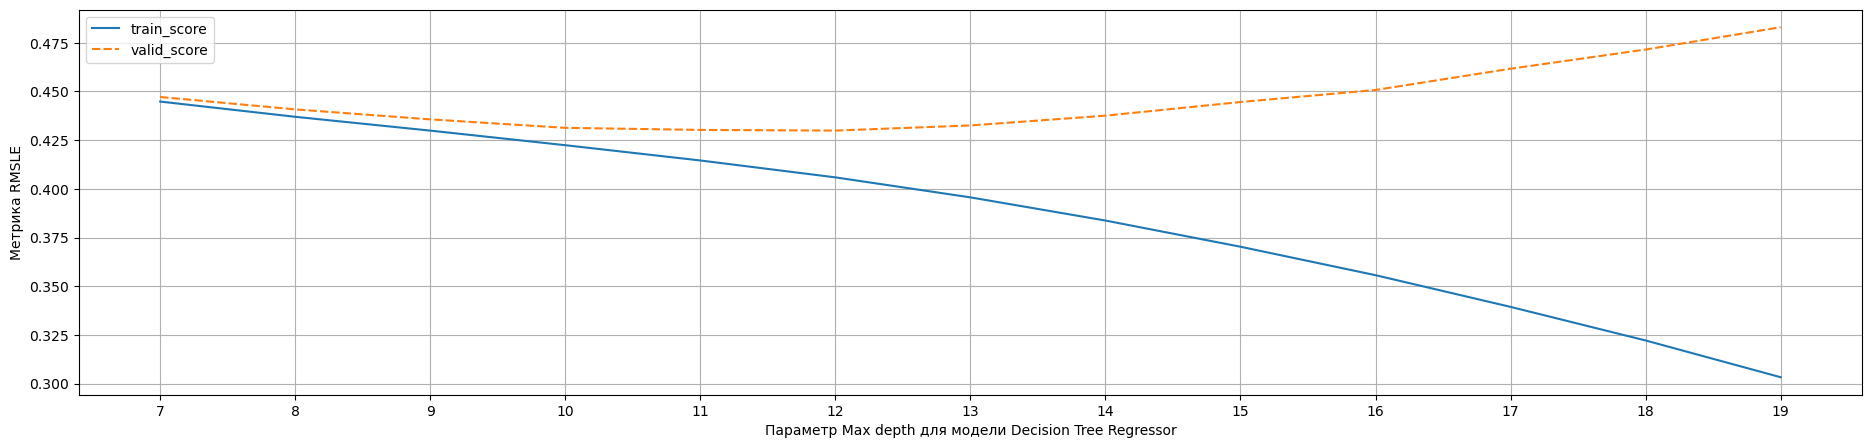

In [129]:
fig, ax = plt.subplots(figsize=(23, 5))

sns.lineplot(score[['train_score', 'valid_score']])

ax.set_xlabel('Параметр Max depth для модели Decision Tree Regressor')
ax.set_ylabel('Метрика RMSLE')
ax.set_xticks(max_depths)
ax.grid()

**Наиболее оптимальная глубина: 12**

In [130]:
dt = DecisionTreeRegressor(max_depth=12)
dt.fit(X_train_scaled, y_train_log)
y_train_log_pred = dt.predict(X_train_scaled)
y_valid_log_pred = dt.predict(X_valid_scaled)

In [131]:
# RMSLE на обучающей выборке
round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)), 2)

0.41

In [132]:
# RMSLE на валидационной выборке
round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)), 2)

0.43

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
forest = RandomForestRegressor(n_estimators=200,
                               max_depth=12,
                               criterion='squared_error',
                               min_samples_split=20,
                               random_state=42,
                               verbose=True,
                               n_jobs=-1)

forest.fit(X_train_scaled, y_train_log)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.4min finished


RandomForestRegressor(max_depth=12, min_samples_split=20, n_estimators=200,
                      n_jobs=-1, random_state=42, verbose=True)

In [135]:
y_train_log_pred = forest.predict(X_train_scaled)
y_valid_log_pred = forest.predict(X_valid_scaled)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    2.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    1.2s finished


In [136]:
# RMSLE на обучающей выборке
round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)), 2)

0.4

In [137]:
# RMSLE на валидационной выборке
round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)), 2)

0.41

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [57]:
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
g_boost = GradientBoostingRegressor(learning_rate=0.5,
                                    n_estimators=100,
                                    max_depth=6, 
                                    min_samples_split=30,
                                    random_state=42,
                                    verbose=True)

g_boost.fit(X_train_scaled, y_train_log)

      Iter       Train Loss   Remaining Time 
         1           0.3110           10.31m
         2           0.2247           10.07m
         3           0.1987            9.91m
         4           0.1876            9.80m
         5           0.1823            9.70m
         6           0.1783            9.59m
         7           0.1756            9.49m
         8           0.1730            9.39m
         9           0.1709            9.29m
        10           0.1696            9.18m
        20           0.1577            8.11m
        30           0.1538            7.07m
        40           0.1502            6.07m
        50           0.1480            5.06m
        60           0.1451            4.04m
        70           0.1431            3.03m
        80           0.1410            2.02m
        90           0.1393            1.01m
       100           0.1383            0.00s


GradientBoostingRegressor(learning_rate=0.5, max_depth=6, min_samples_split=30,
                          random_state=42, verbose=True)

In [59]:
y_train_log_pred = g_boost.predict(X_train_scaled)
y_valid_log_pred = g_boost.predict(X_valid_scaled)

In [60]:
# RMSLE на обучающей выборке
round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)), 2)

0.37

In [142]:
# RMSLE на валидационной выборке
round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)), 2)

0.39

### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


**Градиентный бустинг уверенно вырывается в финал**

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


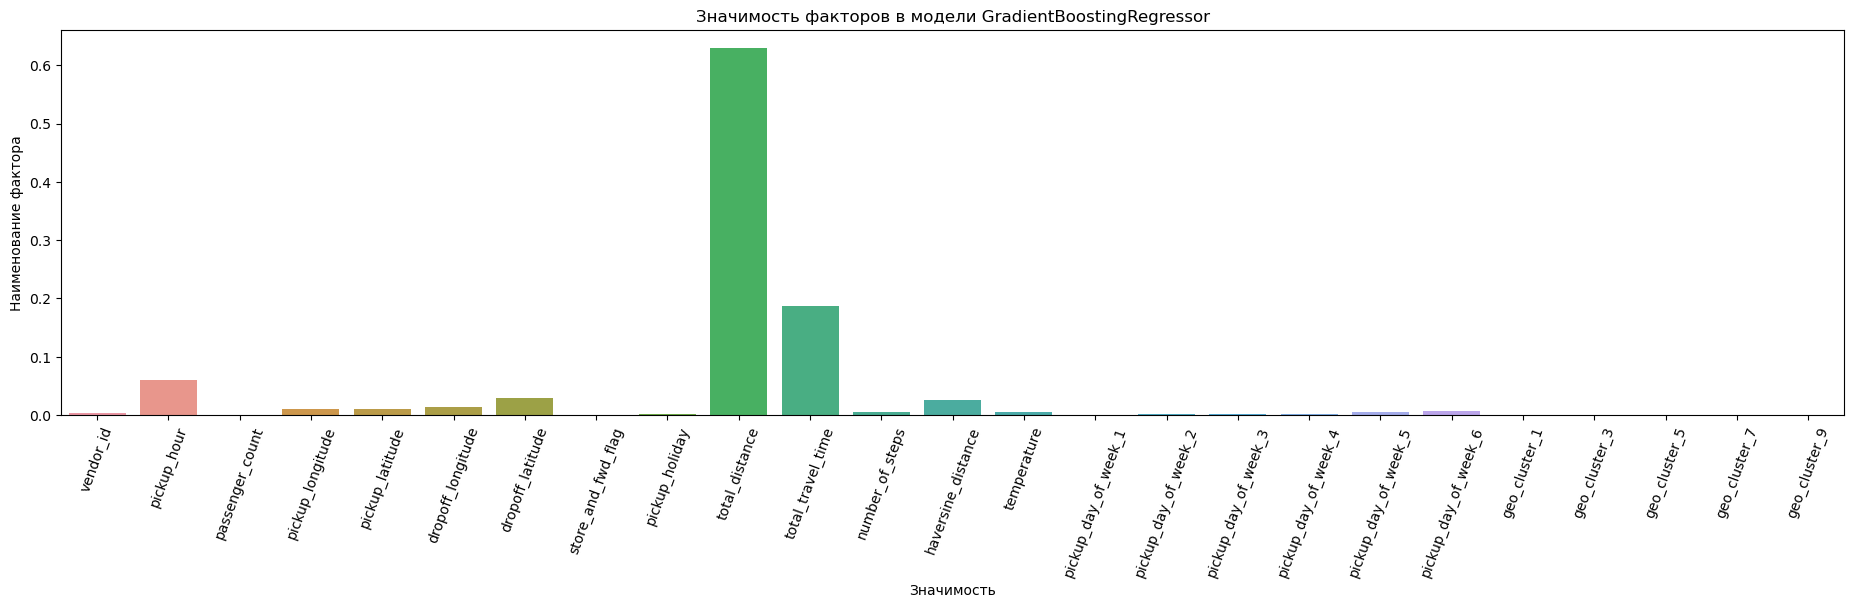

In [143]:
fig, ax = plt.subplots(figsize=(23, 5))

feature = X.columns
feature_importances = g_boost.feature_importances_

sns.barplot(x=best_features, y=feature_importances, orient='v', ax=ax);

ax.set_title('Значимость факторов в модели GradientBoostingRegressor')
ax.tick_params(axis='x', rotation=70);
ax.set_ylabel('Наименование фактора')
ax.set_xlabel('Значимость');

**Ответ:**

1.  total_distance
2.  total_travel_time
3.  pickup_hour

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [144]:
y_val = np.exp(y_valid_log) - 1
y_val_pred = np.exp(g_boost.predict(X_valid_scaled)) - 1

In [145]:
# Медианная абсолютная ошибка предсказания длительности поездки такси на валидационной выборке
round(metrics.median_absolute_error(y_val_pred, y_val)/60, 1)

1.8

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [54]:
test_data = pd.read_csv("./data/test.csv")
osrm_data_test = pd.read_csv("./data/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [55]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = encoder.fit_transform(test_data[columns_to_change])
column_names = encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)

In [56]:
X_test.shape

(625134, 25)

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [61]:
y_test_predict = np.exp(g_boost.predict(X_test_scaled)) - 1

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('./data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [404]:
#!pip install xgboost

После чего модуль можно импортировать:

In [62]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [63]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [64]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42225	valid-rmse:5.42199
[10]	train-rmse:1.93558	valid-rmse:1.93551
[20]	train-rmse:0.78548	valid-rmse:0.78634
[30]	train-rmse:0.47895	valid-rmse:0.48103
[40]	train-rmse:0.42173	valid-rmse:0.42448
[50]	train-rmse:0.40990	valid-rmse:0.41314
[60]	train-rmse:0.40501	valid-rmse:0.40866
[70]	train-rmse:0.40215	valid-rmse:0.40626
[80]	train-rmse:0.39972	valid-rmse:0.40421
[90]	train-rmse:0.39778	valid-rmse:0.40261
[100]	train-rmse:0.39609	valid-rmse:0.40119
[110]	train-rmse:0.39502	valid-rmse:0.40034
[120]	train-rmse:0.39342	valid-rmse:0.39910
[130]	train-rmse:0.39240	valid-rmse:0.39832
[140]	train-rmse:0.39115	valid-rmse:0.39745
[150]	train-rmse:0.39022	valid-rmse:0.39690
[160]	train-rmse:0.38951	valid-rmse:0.39650
[170]	train-rmse:0.38870	valid-rmse:0.39597
[180]	train-rmse:0.38771	valid-rmse:0.39526
[190]	train-rmse:0.38701	valid-rmse:0.39493
[200]	train-rmse:0.38625	valid-rmse:0.39447
[210]	train-rmse:0.38558	valid-rmse:0.39414
[220]	train-rmse:0.38483	valid-rmse:0.39375

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [65]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39166


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

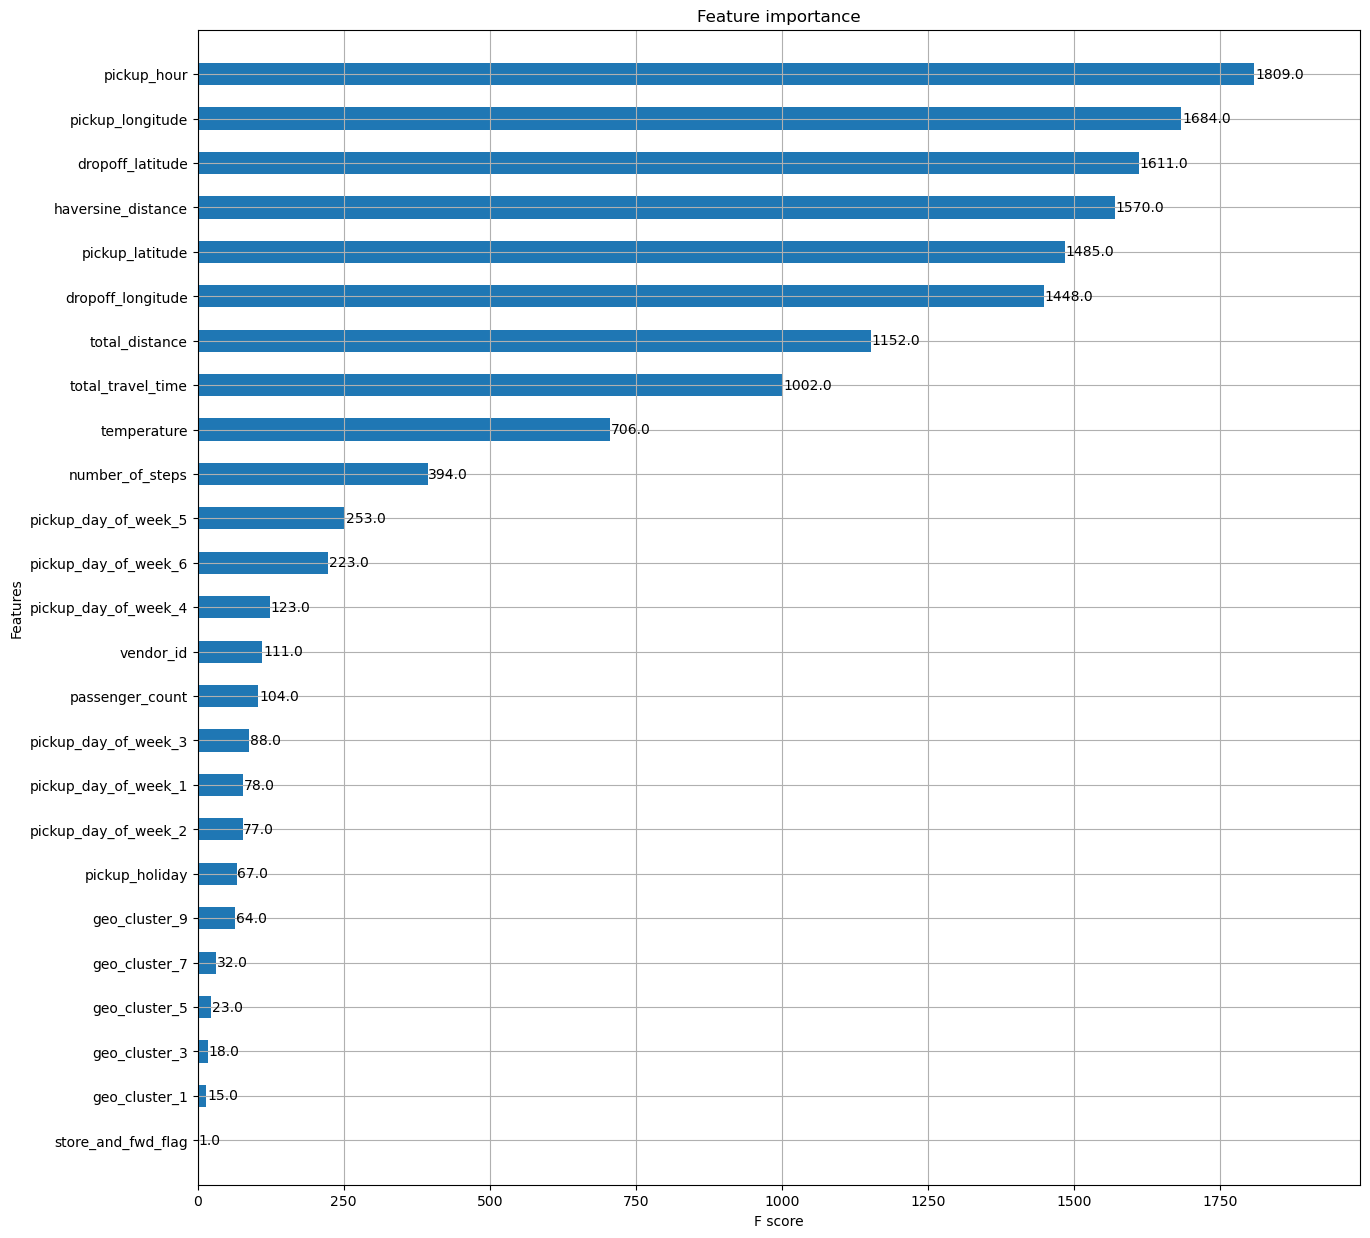

In [154]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)

In [66]:
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('./data/submission_xgb.csv', index=False)

# В качестве бонуса от меня

**Финальное решение на алгоритме Catboost**

In [67]:
# Делаю тренировочную выборку для модели Catbost
# Предобработка для неё будет отличаться
cat_train_data = taxi_data.copy()

In [68]:
# Сбрасываем идентификаторы, но не совсем
cat_train_data.index = cat_train_data.id
cat_train_data.drop('id', axis=1, inplace=True)

In [69]:
# Скидываем также столбец с "утечкой данных"
cat_train_data.drop('dropoff_datetime', axis=1, inplace=True)

In [70]:
# Удаляем столбец с непреобразованной целевой переменной
cat_train_data.drop('trip_duration', axis=1, inplace=True)

In [71]:
def cat_num_split(df: pd.DataFrame) -> tuple:
    '''Ищем категориальные и числовые признаки в датафрейме'''

    cat_columns = []
    num_columns = []

    for column_name in df.columns:
        if (df[column_name].dtypes == object):
            cat_columns += [column_name]
        else:
            num_columns += [column_name]

    print('cat columns:\t ', cat_columns, '\n len = ', len(cat_columns))
    print('num columns:\t ',  num_columns, '\n len = ', len(num_columns))

    return cat_columns, num_columns

In [72]:
cat_columns, num_columns = cat_num_split(cat_train_data)

cat columns:	  ['store_and_fwd_flag', 'events'] 
 len =  2
num columns:	  ['vendor_id', 'pickup_datetime', 'pickup_date', 'pickup_hour', 'pickup_day_of_week', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_holiday', 'total_distance', 'total_travel_time', 'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster', 'temperature', 'visibility', 'wind speed', 'precip', 'trip_duration_log'] 
 len =  22


In [85]:
# Смотрю влияние признаков на целевую переменную по таблице корреляции
cat_train_data_num = cat_train_data[num_columns].dropna()
corr = cat_train_data_num.corr()
corr.style.background_gradient(cmap='RdYlGn')

В принципе, уже на этом этапе есть некое понимание, что признаки:

1. total_distance
2. total_travel_time
3. number_of_steps
4. havesine_distance

Оказывают значительное влияние на целевую переменную и их неплохо было бы включить в модель. Об этом же говорит логика (так как время в пути определенно зависит от общей длительности маршрута). Есть одно но - часть признаков взаимокоррелированы между собой, а это нехорошо и от этого стоило бы избавиться.

Есть два варианта решения этой задачи. Можно посмотреть распределение признаков "засунув" в модель вообще все параметры и посмотрев веса, а потом перебором значимых добиться оптимальной метрики. Можно воспользоваться методом отбора предикторов от sklearn. Можно уменьшить размерность признаков (подав туда все числовые параметры), в результате чего мы гарантировано оставим только важные и уберем взаимокорреляцию между ними. Но при этом, скорее всего, пострадает точность модели.

Так как здесь я провожу полноценный анализ, я попробую все три вышеуказанные варианта.

In [ ]:
# Для тех, кто в колабе

#!pip install catboost

In [73]:
from catboost import CatBoostRegressor
from catboost import Pool

In [74]:
# У нас датасет уже чищенный, но на всякий случай не помешает
cat_train_data = cat_train_data.dropna()

In [97]:
X_cat = cat_train_data.drop(columns = ["trip_duration_log"])
y_cat = cat_train_data["trip_duration_log"]
features_names = list(cat_train_data.drop(columns = ["trip_duration_log"]).columns)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_cat,
                                                                    y_cat,
                                                                    test_size=0.33,
                                                                    random_state=42)

In [98]:
# Алгоритм требует особый подход к слеплению входных параметров
# но зато прекрасно "пережевывает" необработанные категориальные признаки
# кстати, мы помним, что день недели и гео кластер это не совсем числовые параметры
train_data = Pool(
    data=X_train, 
    label=y_train,
    cat_features=['store_and_fwd_flag', 'events', 'pickup_day_of_week', 'geo_cluster'],
    feature_names=features_names
)

eval_data = Pool(
    data=X_test,
    label=y_test,
    cat_features=['store_and_fwd_flag', 'events', 'pickup_day_of_week', 'geo_cluster'],
    feature_names=features_names
)

In [96]:
cat_reg = CatBoostRegressor(depth=10,  # <== вот это уже оптимизированные гиперпараметры
                           l2_leaf_reg=13,  # <== которые я получил чуть ниже
                           learning_rate=0.1,  # <== и на них делаю второй прогон
                           iterations = 5000,  # <== не боюсь переобучения
                           early_stopping_rounds=100,  # <== так как алгоритм сам отожмёт когда хватит
                           verbose = 50,  # <== и по графику первого прогона было видно
                           eval_metric= 'RMSE'  # <== что 1000 итераций это ниочём для хорошей модели
                           )

In [97]:
cat_reg.fit(X=train_data,
            eval_set=eval_data,
           )

0:	learn: 0.7417985	test: 0.7438027	best: 0.7438027 (0)	total: 390ms	remaining: 32m 27s
50:	learn: 0.4086118	test: 0.4112938	best: 0.4112938 (50)	total: 19.5s	remaining: 31m 30s
100:	learn: 0.3944604	test: 0.3979635	best: 0.3979635 (100)	total: 38.6s	remaining: 31m 14s
150:	learn: 0.3868409	test: 0.3918355	best: 0.3918355 (150)	total: 58.3s	remaining: 31m 12s
200:	learn: 0.3814352	test: 0.3880074	best: 0.3880074 (200)	total: 1m 18s	remaining: 31m 5s
250:	learn: 0.3776622	test: 0.3857870	best: 0.3857870 (250)	total: 1m 37s	remaining: 30m 46s
300:	learn: 0.3745450	test: 0.3842117	best: 0.3842117 (300)	total: 1m 57s	remaining: 30m 28s
350:	learn: 0.3720770	test: 0.3830555	best: 0.3830555 (350)	total: 2m 16s	remaining: 30m 6s
400:	learn: 0.3698166	test: 0.3821281	best: 0.3821281 (400)	total: 2m 35s	remaining: 29m 42s
450:	learn: 0.3674925	test: 0.3812199	best: 0.3812199 (450)	total: 2m 55s	remaining: 29m 25s
500:	learn: 0.3652603	test: 0.3805191	best: 0.3805191 (500)	total: 3m 15s	remainin

In [98]:
y_predict = cat_reg.predict(X_test)
round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)), 2)

0.37

**Промежуточный вывод:**

Даже вот так "без заморочек" модель показала итоговую метрику 0.40 на 1000 итерациях, при этом не сработал детектор переобучения, а значит можно учить и понижать метрику дальше. Это очень неплохо. А ведь мы ещё даже гиперпараметры модели не оптимизировали, а там работы - непочатый край. Несомненный плюс ещё и в том, что кошачий_буст работает побыстрее своих конкурентов.

**UPD:**

Как вы наверное догадались (надеюсь), вышеприведенный азбац написан для первого разведывательного прохода на алгоритме без оптимизированных гиперпараметров (которые я получил чуть ниже). И там действительно было 1000 итераций и метрика 40. А щас я запустил уже большее количество итераций, не боясь переобучения, а также указав оптимизированные гиперпараметры. И история обучения в выходном окне выше (а также график для обучения и веса) именно от второго оптимизированного прохода. Чтобы по 10 раз один и тот же код не писать. Хотя по истории видно, что 1000 итераций был хватило, выигрываю только 0.00ХХХ значения в метрике.

**Смотрим визуализацию параметров модели**

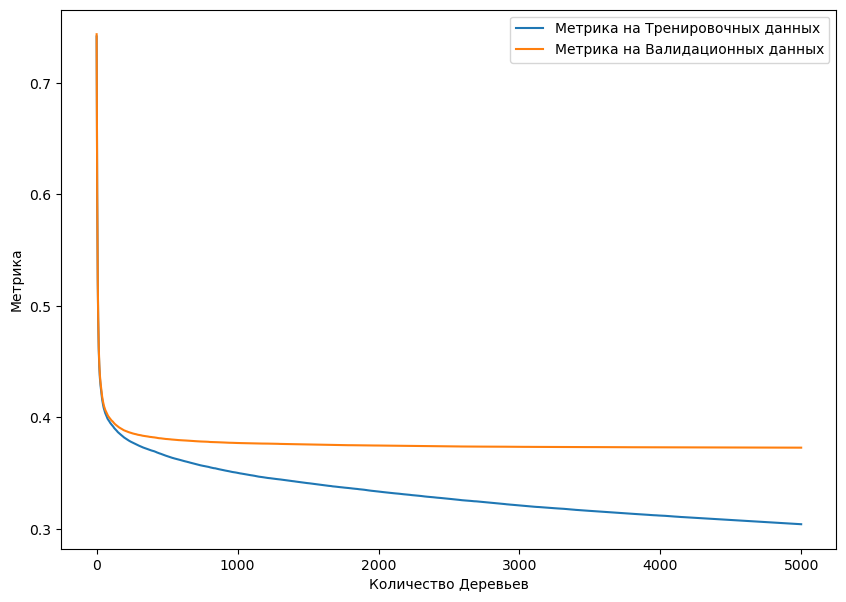

In [99]:
results = cat_reg.evals_result_
plt.figure(figsize=(10,7))
plt.plot(results["learn"]["RMSE"], label="Метрика на Тренировочных данных")
plt.plot(results["validation"]["RMSE"], label="Метрика на Валидационных данных")
plt.xlabel("Количество Деревьев")
plt.ylabel("Метрика")
plt.legend();

На первом разведывательном проходе, без оптимизированных гиперпараметров и на 1000 итерациях хорошо пошли кривулины, кучно, поэтому решил второй раз накинуть количество итераций до 5000. Щас видно, что можно было останавливаться гораздо раньше, но не беда, по крайней мере модель я переобучить не должен был, т.к. метрика на тестовой выборке весь процесс обучения понижалась. 

In [100]:
def feature_importance_plotter(model: CatBoostRegressor,
                               features_names: list):
    '''Отрисовываем график распределения весов модели'''
    
    ftr_imp = model.feature_importances_/np.sum(model.feature_importances_)

    sorted = np.argsort(ftr_imp)
    ypos = np.arange(len(features_names))

    fig = plt.figure(figsize=(8, 4))
    plt.barh(ypos, ftr_imp[sorted])
    plt.xlim([0, 1])
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos, features_names[sorted]);

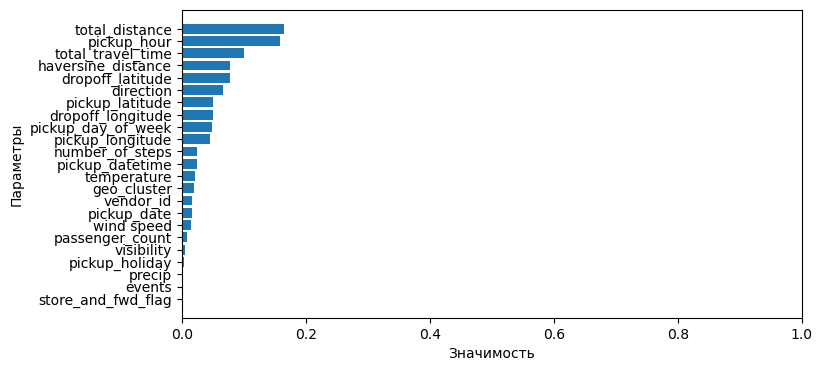

In [101]:
feature_importance_plotter(cat_reg, np.array(features_names))

Распределение весов ожидаемое. Но что же нас здесь удивляет, давайте посмотрим вместе повнимательнее. Итак:

**Неожиданно**, параметр **store_and_fwd_flag**, который согласно соображений авторов примеров из данной лабораторной должен оказывать ***хотя бы какое-то*** влияние на целевую переменную, имеет у нас здесь нулевой вес! Вот это чудеса! Ну, значит модель просто неудачная попалась.

Такое же удивление возникает, когда мы обнаруживаем определенный вес у параметра vendor_id, который по нашим представлениям уж совсем не должен ни на что влиять. Вот это номер!

В принципе, здесь это действительно не показатель. Но утверждать о том, что распределения существенно отличаются друг от друга (как делают это авторы данного курса), когда матожидание смещено на 0.1 при дисперсии в несколько единиц и при разнице в сравниваемых выборках ***на порядки***, это, конечно, чрезмерно оптимистично, на мой взгляд.

**Что нам тут может не нравится:**

Некоторые признаки, наиболее значимые для модели, как мы помним по таблице корреляции взаимно коррелированы между собой. Это не совсем правильно. Плюс параметров не совсем уж перебор, но многовато. Поэтому на следующем шаге я попробую снизить размерность входных параметров, воспользовавшись для этого самой банальной PCA.

In [99]:
from sklearn.decomposition import PCA

In [100]:
cat_num = cat_train_data.drop(['store_and_fwd_flag',
                               'events',
                               'pickup_day_of_week',
                               'geo_cluster',
                               'pickup_holiday'], axis=1)

In [101]:
# Заодно уберем ещё и даты, они уже тоже отработали своё
cat_num.drop(['pickup_datetime', 'pickup_date'], axis=1, inplace=True)

In [102]:
pt = preprocessing.PowerTransformer(method='yeo-johnson',
                                    standardize=True)

In [103]:
# Тут мы предварительно хорошенечко наЙеоДжонсим наши входные параметры
# тем более у нас и стандартизация в базовую программу включена
cat_num = pt.fit_transform(cat_num)

In [104]:
pca = PCA(n_components=5)

In [105]:
cat_num = pca.fit_transform(cat_num)

In [106]:
cat_num = pd.DataFrame(cat_num, columns=['feature_1',
                                         'feature_2', 
                                         'feature_3', 
                                         'feature_4', 
                                         'feature_5'])

In [107]:
corr = cat_num.corr()
corr.style.background_gradient(cmap='RdYlGn')

Ну вот, замечательные никак не скоррелированные между собой входные параметры. 5 штук!

In [108]:
cat_cat = cat_train_data[['store_and_fwd_flag',
                          'events',
                          'pickup_day_of_week',
                          'geo_cluster']].reset_index()

In [109]:
# Так будет правильнее, так как формально это категориальные параметры
cat_cat.pickup_day_of_week = cat_cat.pickup_day_of_week.astype('object')
cat_cat.geo_cluster = cat_cat.geo_cluster.astype('object')

In [110]:
cat_cat.drop('id', axis=1, inplace=True)

In [111]:
cat_X = pd.concat([cat_num, cat_cat], axis=1)

In [112]:
# То, что доктор прописал
cat_X.head(1)

feature_1  feature_2  feature_3  feature_4  feature_5 store_and_fwd_flag  \
0   1.370286   3.817917  -0.713241   2.948896  -0.540134                  N   

  events pickup_day_of_week geo_cluster  
0   None                  0           9

In [113]:
features_names = list(cat_X.columns)

X_train, X_test, y_train, y_test = model_selection.train_test_split(cat_X,
                                                                    y_cat,
                                                                    test_size=0.33,
                                                                    random_state=42)

In [114]:
train_data = Pool(
    data=X_train, 
    label=y_train,
    cat_features=['store_and_fwd_flag',
                  'events',
                  'pickup_day_of_week',
                  'geo_cluster'],
    feature_names=features_names
)

eval_data = Pool(
    data=X_test,
    label=y_test,
    cat_features=['store_and_fwd_flag',
                  'events',
                  'pickup_day_of_week',
                  'geo_cluster'],
    feature_names=features_names
)

In [159]:
cat_reg = CatBoostRegressor(depth=10,
                            l2_leaf_reg=13,
                            learning_rate=0.1,
                            iterations = 1000,
                            early_stopping_rounds=100,
                            verbose = 50,
                            eval_metric='RMSE')

В принципе, для уменьшенной размерности нужно заново гиперпараметры модели оптимизировать, но уж как есть так есть, второй раз оптимизацию длительностью в полтора часа я не переживу.

In [160]:
cat_reg.fit(X=train_data,
            eval_set=eval_data,
           )

0:	learn: 0.7352297	test: 0.7371221	best: 0.7371221 (0)	total: 451ms	remaining: 7m 30s
50:	learn: 0.3715045	test: 0.3741647	best: 0.3741647 (50)	total: 23.7s	remaining: 7m 21s
100:	learn: 0.3625103	test: 0.3661003	best: 0.3661003 (100)	total: 45.3s	remaining: 6m 43s
150:	learn: 0.3577345	test: 0.3623817	best: 0.3623817 (150)	total: 1m 5s	remaining: 6m 9s
200:	learn: 0.3541649	test: 0.3599485	best: 0.3599485 (200)	total: 1m 26s	remaining: 5m 45s
250:	learn: 0.3514486	test: 0.3581744	best: 0.3581744 (250)	total: 1m 48s	remaining: 5m 23s
300:	learn: 0.3492660	test: 0.3569526	best: 0.3569526 (300)	total: 2m 9s	remaining: 5m
350:	learn: 0.3475283	test: 0.3559236	best: 0.3559236 (350)	total: 2m 29s	remaining: 4m 36s
400:	learn: 0.3458283	test: 0.3550656	best: 0.3550656 (400)	total: 2m 51s	remaining: 4m 15s
450:	learn: 0.3445705	test: 0.3544690	best: 0.3544690 (450)	total: 3m 11s	remaining: 3m 53s
500:	learn: 0.3432619	test: 0.3537946	best: 0.3537945 (499)	total: 3m 32s	remaining: 3m 31s
550:

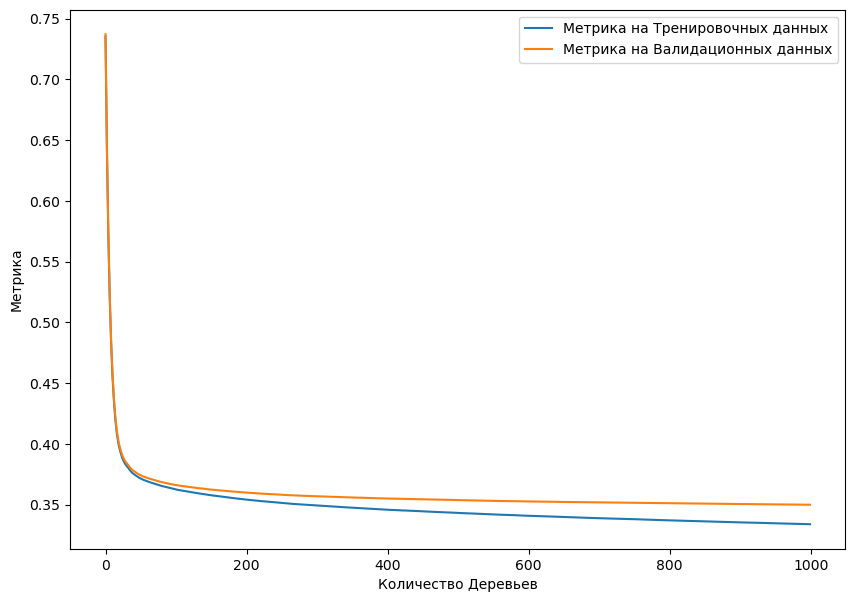

In [161]:
results = cat_reg.evals_result_
plt.figure(figsize=(10,7))
plt.plot(results["learn"]["RMSE"], label="Метрика на Тренировочных данных")
plt.plot(results["validation"]["RMSE"], label="Метрика на Валидационных данных")
plt.xlabel("Количество Деревьев")
plt.ylabel("Метрика")
plt.legend();

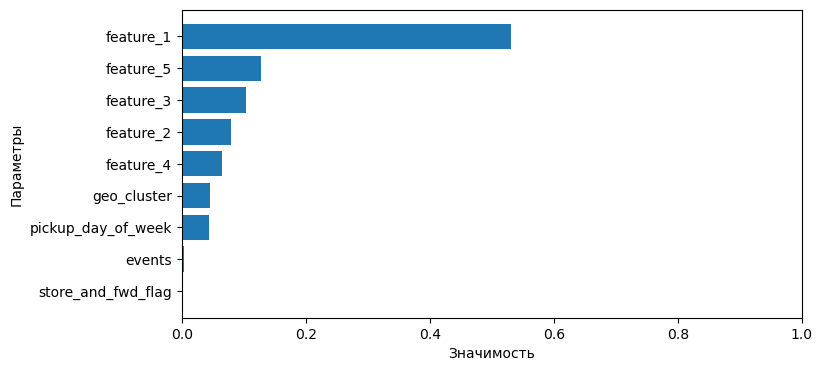

In [162]:
feature_importance_plotter(cat_reg, np.array(features_names))

Неожиданно, уменьшенная размерность недрогнувшей рукой вырывает очко победителя и выходит в лидеры нашего неофициального рейтинга. RMSE 0.35 на тестовой выборке, как тебе такое, Илон Маск? 

Как мы видим из графика, входные параметры events, **store_and_fwd_flag** нужно выбрасывать (***как же так, я не могу поверить своим глазам...***).

**Итог:**

Немного поразмыслив, пришёл к следующему выводу:
В финальной модели буду использовать уменьшенную размерность от всех входных фич на 5 главных компонентах, а также категориальные признаки geo_cluster, pickup_day_of_week

In [115]:
fin_cat = cat_X.copy()

In [116]:
fin_cat.drop(['events', 'store_and_fwd_flag'], axis=1, inplace=True)

In [117]:
fin_cat.head(1)

feature_1  feature_2  feature_3  feature_4  feature_5 pickup_day_of_week  \
0   1.370286   3.817917  -0.713241   2.948896  -0.540134                  0   

  geo_cluster  
0           9

In [118]:
features_names = list(fin_cat.columns)

In [119]:
# Щас уже не делим на подвыборки, загоняем всё как есть
train_data = Pool(
    data=fin_cat, 
    label=y_cat,
    cat_features=['pickup_day_of_week',
                  'geo_cluster'],
    feature_names=features_names
)

**Оптимизирую гиперпараметры:**

Играет тревожная музыка...

In [120]:
model = CatBoostRegressor()

In [72]:
# Ну, хотя бы такие. На все гиперпараметры у меня терпения не хватит
grid = {'learning_rate': [0.03, 0.1, 0.5],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 5, 9, 13]}

grid_search_result = model.grid_search(grid, train_data)

0:	learn: 6.3220440	test: 6.3249671	best: 6.3249671 (0)	total: 204ms	remaining: 3m 23s
1:	learn: 6.1338381	test: 6.1367287	best: 6.1367287 (1)	total: 316ms	remaining: 2m 37s
2:	learn: 5.9512628	test: 5.9541310	best: 5.9541310 (2)	total: 426ms	remaining: 2m 21s
3:	learn: 5.7742822	test: 5.7771067	best: 5.7771067 (3)	total: 534ms	remaining: 2m 13s
4:	learn: 5.6026878	test: 5.6054529	best: 5.6054529 (4)	total: 636ms	remaining: 2m 6s
5:	learn: 5.4362042	test: 5.4389409	best: 5.4389409 (5)	total: 734ms	remaining: 2m 1s
6:	learn: 5.2747827	test: 5.2774990	best: 5.2774990 (6)	total: 832ms	remaining: 1m 58s
7:	learn: 5.1183725	test: 5.1210801	best: 5.1210801 (7)	total: 936ms	remaining: 1m 56s
8:	learn: 4.9665093	test: 4.9692015	best: 4.9692015 (8)	total: 1.03s	remaining: 1m 54s
9:	learn: 4.8194206	test: 4.8220978	best: 4.8220978 (9)	total: 1.14s	remaining: 1m 52s
10:	learn: 4.6765517	test: 4.6791984	best: 4.6791984 (10)	total: 1.25s	remaining: 1m 52s
11:	learn: 4.5380039	test: 4.5406296	best: 

In [73]:
grid_search_result['params']

{'depth': 10, 'l2_leaf_reg': 13, 'learning_rate': 0.1}

In [121]:
# Смертельный номер - второй заход на уменьшенной размерности
# Ну, хотя бы такие. На все гиперпараметры у меня терпения не хватит

grid = {'learning_rate': [0.1],
        'depth': [9, 11, 13],
        'l2_leaf_reg': [11, 13, 15]}

grid_search_result = model.grid_search(grid, train_data)

0:	learn: 5.8687885	test: 5.8716531	best: 5.8716531 (0)	total: 356ms	remaining: 5m 55s
1:	learn: 5.2857046	test: 5.2884359	best: 5.2884359 (1)	total: 605ms	remaining: 5m 2s
2:	learn: 4.7613992	test: 4.7640284	best: 4.7640284 (2)	total: 874ms	remaining: 4m 50s
3:	learn: 4.2899766	test: 4.2925159	best: 4.2925159 (3)	total: 1.14s	remaining: 4m 43s
4:	learn: 3.8661839	test: 3.8686199	best: 3.8686199 (4)	total: 1.38s	remaining: 4m 34s
5:	learn: 3.4850832	test: 3.4874839	best: 3.4874839 (5)	total: 1.6s	remaining: 4m 25s
6:	learn: 3.1426387	test: 3.1449321	best: 3.1449321 (6)	total: 1.86s	remaining: 4m 24s
7:	learn: 2.8342698	test: 2.8364699	best: 2.8364699 (7)	total: 2.11s	remaining: 4m 21s
8:	learn: 2.5574646	test: 2.5595352	best: 2.5595352 (8)	total: 2.33s	remaining: 4m 17s
9:	learn: 2.3094658	test: 2.3114592	best: 2.3114592 (9)	total: 2.58s	remaining: 4m 15s
10:	learn: 2.0863782	test: 2.0882596	best: 2.0882596 (10)	total: 2.81s	remaining: 4m 13s
11:	learn: 1.8872573	test: 1.8890863	best: 

In [122]:
grid_search_result['params']

{'depth': 13, 'l2_leaf_reg': 11, 'learning_rate': 0.1}

# Самая финальная модель

In [125]:
# Щас уже не делим на подвыборки, загоняем всё как есть
fin_train_data = Pool(data=fin_cat, 
                      label=y_cat,
                      cat_features=['pickup_day_of_week',
                                    'geo_cluster'],
                      feature_names=features_names)

In [127]:
cat_reg = CatBoostRegressor(depth=11,  # <<== Самая последняя версия
                            l2_leaf_reg=13,  # <<== оптимизированных гиперпараметров
                            learning_rate=0.1,  # <<== конкретно для уменьшенной размерности
                            iterations = 420,  # <== В самый раз должно быть
                            eval_metric='RMSE')

In [128]:
cat_reg.fit(X=fin_train_data)

0:	learn: 0.7356534	total: 464ms	remaining: 3m 14s
1:	learn: 0.6857132	total: 1.02s	remaining: 3m 32s
2:	learn: 0.6422961	total: 1.5s	remaining: 3m 29s
3:	learn: 0.6045580	total: 1.98s	remaining: 3m 26s
4:	learn: 0.5715341	total: 2.45s	remaining: 3m 23s
5:	learn: 0.5433739	total: 2.88s	remaining: 3m 18s
6:	learn: 0.5191353	total: 3.35s	remaining: 3m 17s
7:	learn: 0.4981710	total: 3.77s	remaining: 3m 14s
8:	learn: 0.4802616	total: 4.25s	remaining: 3m 14s
9:	learn: 0.4649434	total: 4.71s	remaining: 3m 12s
10:	learn: 0.4520960	total: 5.13s	remaining: 3m 10s
11:	learn: 0.4412136	total: 5.58s	remaining: 3m 9s
12:	learn: 0.4320330	total: 6.06s	remaining: 3m 9s
13:	learn: 0.4243995	total: 6.51s	remaining: 3m 8s
14:	learn: 0.4177377	total: 6.97s	remaining: 3m 8s
15:	learn: 0.4120224	total: 7.38s	remaining: 3m 6s
16:	learn: 0.4072034	total: 7.83s	remaining: 3m 5s
17:	learn: 0.4031241	total: 8.3s	remaining: 3m 5s
18:	learn: 0.3996478	total: 8.73s	remaining: 3m 4s
19:	learn: 0.3965136	total: 9.13

In [129]:
import pickle

In [130]:
# Сохраню модель от греха подальше
with open('final_model.pkl', 'wb') as file:
    pickle.dump(model, file)

## Готовим тестовый набор

In [131]:
test_data = pd.read_csv("./data/test.csv")
osrm_data_test = pd.read_csv("./data/osrm_data_test.csv")
test_id = test_data['id']

In [132]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

In [133]:
cat_test_data = test_data.copy()

In [134]:
cat_train_data.columns

Index(['vendor_id', 'pickup_datetime', 'pickup_date', 'pickup_hour',
       'pickup_day_of_week', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'pickup_holiday', 'total_distance',
       'total_travel_time', 'number_of_steps', 'haversine_distance',
       'direction', 'geo_cluster', 'temperature', 'visibility', 'wind speed',
       'precip', 'events', 'trip_duration_log'],
      dtype='object')

In [135]:
cat_test_data.drop('id', axis=1, inplace=True)

In [136]:
cat_test_data.columns

Index(['vendor_id', 'pickup_datetime', 'pickup_date', 'pickup_hour',
       'pickup_day_of_week', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'pickup_holiday', 'total_distance',
       'total_travel_time', 'number_of_steps', 'haversine_distance',
       'direction', 'geo_cluster', 'temperature', 'visibility', 'wind speed',
       'precip', 'events'],
      dtype='object')

### Уменьшаем размерность тестовой выборки

In [137]:
# Да, надо было сделать предобработку функциями, как в проекте, но время поджимает
cat_test_num = cat_test_data.drop(['store_and_fwd_flag',
                                   'events',
                                   'pickup_day_of_week',
                                   'geo_cluster',
                                   'pickup_holiday'], axis=1)

In [138]:
cat_test_num.drop(['pickup_datetime', 'pickup_date'], axis=1, inplace=True)

In [139]:
cat_test_num = pt.fit_transform(cat_test_num)

In [140]:
cat_test_num = pca.fit_transform(cat_test_num)

In [141]:
cat_test_num = pd.DataFrame(cat_test_num, columns=['feature_1',
                                                  'feature_2', 
                                                  'feature_3', 
                                                  'feature_4', 
                                                  'feature_5'])

In [142]:
cat_test_num.head(1)

feature_1  feature_2  feature_3  feature_4  feature_5
0   -0.16047   0.215773  -0.345338  -2.233686   1.203797

In [143]:
cat_test_cat = cat_test_data[['pickup_day_of_week',
                              'geo_cluster']].reset_index()

In [144]:
cat_X_test = pd.concat([cat_test_num, cat_test_cat], axis=1)

In [145]:
cat_X_test.drop('index', axis=1, inplace=True)

In [146]:
cat_X_test.head(1)

feature_1  feature_2  feature_3  feature_4  feature_5  pickup_day_of_week  \
0   -0.16047   0.215773  -0.345338  -2.233686   1.203797                   3   

   geo_cluster  
0            0

In [147]:
y_test_predict = np.exp(cat_reg.predict(cat_X_test)) - 1

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('./data/cat_submission.csv', index=False)

In [148]:
submission

id  trip_duration
0       id3004672     934.378847
1       id3505355     784.501547
2       id1217141     526.411439
3       id2150126    1006.896884
4       id1598245     402.361467
...           ...            ...
625129  id3008929     484.773658
625130  id3700764     895.606699
625131  id2568735    1033.831959
625132  id1384355    1538.875827
625133  id0621643    1384.198517

[625134 rows x 2 columns]

# Вывод:

Проведена очень большая работа, созданы несколько полноценных моделей, за которые практически не стыдно. Хотя я предпочитаю наличие большей самостоятельности и творчества в контрольных заданиях, но в принципе, всё пойдёт на пользу. По этапам:

1. На этапе подготовки общего датасета были созданы функции, которые привносят новые признаки на основании уже существующих и обогащают датасет с помощью других источников информации. Несмотря на то, что задания жёстко линейные и почти синтетические, "руку набить" полезно.
2. На этапе анализа данных, в том числе путём просмотра глазами на графиках, ещё раз повспоминали навыки визуализации, а где-то что-то узнали новое. Полезно. В корне не согласен про распределения признака в зависимости от отправки сообщения (да/нет), что это разные распределения. История (в виде баланса в весе всех последующих моделей) рассудила так, что этот признак не имеет влияния на целевую переменную, а это косвенно подтверждает, что распределения одинаковые с небольшой погрешностью из-за количества записей, их составляющих. Ответ на платформе считаю не верным (вернее, сам вопрос про эти распределения некорректным). Карта города красивая, но понять из этого скатерплотта, сколько кластеров отсутствуют на ней, нереально, КМК. Так что вопрос тоже такой себе...
3. Отбор признаков почему-то происходил без таблицы корреляции, это удивило честно говоря. Ну и всецело полагаться на feature_selection, КМК, довольно рискованное занятие.Он же там отобрал часть взаимно-коррелированных параметров, а это вроде бы как не совсем правильно. В-общем, я сделал и забыл, сам сделал бы по другому.
4. Побаловались с простыми модельками, посмотрели на разные интересные метрики. Переобучение там, все дела. Поняли, что такое бывает и как это страшно и прониклись.
5. Побаловались с бустингами, посмотрели метрики, построили диаграммы весов. Красота... Не хватает только деревья решений по конкретным обученным моделям визуализировать для полной картины.
6. Теперь хотя бы немного самостоятельности в финале. В авторском подходе применялся Catboost не потому, что я сравнил с вышеупомянутыми моделями и метрики оказались лучше, а потому, что в тяжелую лихую годину надо ориентироваться на импортозамещение (с). Ну и потому, что мне от тупо больше нравится. Теперь здесь по шагам:
   - Нарисовал таблицу корреляции, она разноцветная и очень красивая, плюс там можно посмотреть влияние признаков до того, как модель переварила их и выдала в виде таблицы весов. Неожиданно, но как правило, таблица корреляции и веса модели имеют довольно сильную корреляцию (прошу прощения за каламбур). Также из этой таблицы мы увидели, что наиболее коррелирующие с целевой переменной признаки также взаимокоррелируют между собой, а это не очень хорошо.
   - Несмотря на то, что на предыдущем этапе уже можно было делать какие-то выводы с окончательным набором входных фич и строить на них красивую модельку, я взял и заставил Catboost пережевать вообще всё, что можно. Я всегда так делаю и мне не особо стыдно :). Зато я посмотрел на таблицу весов и убедился, что в важные попали всё же те, про которые я так думал.
   - Тут я подумал, а если у нас так много входных параметров (на самом деле не много, средненько), плюс они взаимокоррелированы, а не применить-ка тут PCA? Зря мне что ли про него Антон Юрьевич рассказывал. И применил. Предварительно сделал предобработку через PowerTransform, но не потому, что посмотрел на графики распределения входных параметров (как нужно было бы сделать), а потому что могу :). Плюс от хорошего PowerTransform"а ещё никому плохо не было, а для PCA это must have. И в итоге неожиданно получаю вполне приличную метрику в районе 0.37, что на 0.02 лучше, чем у хвалёного вышеупоминавшегося xgb. Ну раз так хорошо пошло, решил так и дальше делать.
   - Сделал оптимизацию гиперпараметров, аж два раза, а это часа по полтора каждый. Зато поел нормально, ну и так передохнул слегка. Нашёл вроде оптимальный набор.
   - Запилил тестовый датасет под свою собственными руками взрощенную моделюшку, погадал по ней на тестовой выборке, результаты тщательно записал и положил в папку.
   - На всякий случай глазами посмотрел таблички по тестовой выборке с xgb и моей. Отличаются, заразы, местами прям сильно. Но я в свою отечественную модель верю и с оптимизмом смотрю в будущее!
   - Ожидаю адекватной (ну то есть не низкой) оценки :). Всё ж таки старался)). 